## WorldBank Indicators Dataset
**Selected indicators:**
- pollution
- gdp
- energy
- urbanization
- population

**Countries:**
- Europe (nr.: 44)

**Years:**
- [2017, 2024]
- *years of interest for the project analysis (for now) [2018, 2022]*

### Import libraries

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math

### Download data

In [285]:
df_wb = pd.read_csv("WorldBank_indc_2017-2024.csv")

df_wb

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Albania,ALB,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,-19.3194985778995,-19.728822741569,-24.9973664805646,-31.2636378685046,-23.0681253856225,-31.9212652932236,-36.4554333268122,-36.1379061263187
1,Albania,ALB,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.MT.CE.AR5,5.3613,5.3341,4.984,4.5676,5.1122,4.5239,4.2226,4.2437
2,Albania,ALB,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,2.0244422333699,2.04549315439886,1.94096037816015,1.80646079858255,2.0532886275877,1.84525761573088,1.74914408919284,1.7852214941728
3,Albania,ALB,Carbon dioxide (CO2) emissions from Agricultur...,EN.GHG.CO2.AG.MT.CE.AR5,0.0542,0.0465,0.0664,0.0606,0.0483,0.0607,0.062,0.0633
4,Albania,ALB,Carbon dioxide (CO2) emissions from Building (...,EN.GHG.CO2.BU.MT.CE.AR5,0.7568,0.7636,0.7747,0.7445,0.7956,0.7827,0.7439,0.7557
...,...,...,...,...,...,...,...,...,...,...,...,...
3300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3303,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing

In [286]:
df_wb.dtypes

Country Name     object
Country Code     object
Series Name      object
Series Code      object
2017 [YR2017]    object
2018 [YR2018]    object
2019 [YR2019]    object
2020 [YR2020]    object
2021 [YR2021]    object
2022 [YR2022]    object
2023 [YR2023]    object
2024 [YR2024]    object
dtype: object

In [287]:
list_years = ["2017 [YR2017]","2018 [YR2018]","2019 [YR2019]","2017 [YR2017]","2017 [YR2017]","2017 [YR2017]"]

for year in list_years:
    df_wb.replace('..', np.nan, inplace=True) # replace '..' for nan values
    df_wb = df_wb[~df_wb[year].isna()] # remove all nan values
    df_wb = df_wb.astype({year: 'float'}) # transform numeric values to float type


In [288]:
print(df_wb.shape)
df_wb.head(5)

(2627, 12)


,Country Name,Country Code,Series Name,Series Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Albania,ALB,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,-19.319499,-19.728823,-24.997366,-31.2636378685046,-23.0681253856225,-31.9212652932236,-36.4554333268122,-36.1379061263187
1,Albania,ALB,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.MT.CE.AR5,5.361300,5.334100,4.984000,4.5676,5.1122,4.5239,4.2226,4.2437
2,Albania,ALB,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,2.024442,2.045493,1.940960,1.80646079858255,2.0532886275877,1.84525761573088,1.74914408919284,1.7852214941728
3,Albania,ALB,Carbon dioxide (CO2) emissions from Agricultur...,EN.GHG.CO2.AG.MT.CE.AR5,0.054200,0.046500,0.066400,0.0606,0.0483,0.0607,0.062,0.0633
4,Albania,ALB,Carbon dioxide (CO2) emissions from Building (...,EN.GHG.CO2.BU.MT.CE.AR5,0.756800,0.763600,0.774700,0.7445,0.7956,0.7827,0.7439,0.7557


In [289]:
df_wb.describe

<bound method NDFrame.describe of         Country Name Country Code  \
0            Albania          ALB   
1            Albania          ALB   
2            Albania          ALB   
3            Albania          ALB   
4            Albania          ALB   
...              ...          ...   
3295  United Kingdom          GBR   
3296  United Kingdom          GBR   
3297  United Kingdom          GBR   
3298  United Kingdom          GBR   
3299  United Kingdom          GBR   

                                            Series Name  \
0     Carbon dioxide (CO2) emissions (total) excludi...   
1     Carbon dioxide (CO2) emissions (total) excludi...   
2     Carbon dioxide (CO2) emissions excluding LULUC...   
3     Carbon dioxide (CO2) emissions from Agricultur...   
4     Carbon dioxide (CO2) emissions from Building (...   
...                                                 ...   
3295        Electric power consumption (kWh per capita)   
3296                              GDP growth (ann

In [290]:
year_cols = [col for col in df_wb.columns if 'YR' in col]

# Melt to long format
df_long = df_wb.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'  # Creates the column for pivot
)

# Clean the year column
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})').astype(int)

df_long.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Albania,ALB,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,2017,-19.319499
1,Albania,ALB,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.MT.CE.AR5,2017,5.3613
2,Albania,ALB,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,2017,2.024442
3,Albania,ALB,Carbon dioxide (CO2) emissions from Agricultur...,EN.GHG.CO2.AG.MT.CE.AR5,2017,0.0542
4,Albania,ALB,Carbon dioxide (CO2) emissions from Building (...,EN.GHG.CO2.BU.MT.CE.AR5,2017,0.7568


In [291]:
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

In [292]:
df_wb_new = df_long.pivot_table(
    index=['Country Name', 'Country Code', 'Year'],  # row identifiers
    columns='Series Name',  # indicators become columns
    values='Value'          # fill with these numbers
).reset_index()

# Remove the name added to columns by pivot
df_wb_new.columns.name = None

df_wb_new

,Country Name,Country Code,Year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: energy depletion (% of GNI),Agricultural land (% of land area),Agricultural land (sq. km),Alternative and nuclear energy (% of total energy use),...,Population in urban agglomerations of more than 1 million,Renewable energy consumption (% of total final energy consumption),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Total greenhouse gas emissions including LULUCF (Mt CO2e),Urban population,Urban population (% of total population),Urban population growth (annual %)
0,Albania,ALB,2017,99.9,99.7,100.0,0.708999,42.856971,11742.810,16.98,...,NaN,36.9,13.5,17.7,9.1947,3.471945,10.5403,1482517.0,55.980276,-0.814539
1,Albania,ALB,2018,100.0,100.0,100.0,0.904368,42.849672,11740.810,31.74,...,NaN,37.8,13.5,17.7,9.1911,3.524556,10.5367,1470162.0,56.377000,-0.836872
2,Albania,ALB,2019,100.0,100.0,100.0,0.918745,42.846715,11740.000,19.80,...,NaN,40.1,14.2,18.6,8.6662,3.374950,10.0118,1457584.0,56.763907,-0.859233
3,Albania,ALB,2020,100.0,100.0,100.0,0.348289,42.538504,11655.550,21.75,...,NaN,44.4,14.2,18.6,7.9972,3.162849,9.3428,1444795.0,57.140859,-0.881283
4,Albania,ALB,2021,100.0,100.0,100.0,0.597381,41.471898,11363.300,34.43,...,NaN,41.9,14.2,18.6,8.4963,3.412495,9.8419,1431805.0,57.507719,-0.903156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,United Kingdom,GBR,2020,100.0,100.0,100.0,0.260168,71.340049,172592.981,13.78,...,18203956.0,13.6,40.3,28.7,421.5411,6.315790,414.8624,55330777.0,82.900002,0.447347
348,United Kingdom,GBR,2021,100.0,100.0,100.0,0.520438,71.157529,172151.410,12.03,...,18384732.0,12.2,39.9,27.8,437.8694,6.536925,431.0206,55589113.0,82.988643,0.465807
349,United Kingdom,GBR,2022,100.0,100.0,99.9,NaN,71.981642,174145.186,13.76,...,18560649.0,NaN,39.9,27.8,423.3672,6.262458,416.8073,56162292.0,83.075398,1.025820
350,United Kingdom,GBR,2023,100.0,100.0,100.0,NaN,70.307323,170094.506,13.35,...,18730964.0,NaN,39.9,27.8,400.6095,5.848997,394.5741,56958080.0,83.160193,1.406999


(array([12.,  1., 10., 32.,  8.,  1.,  1.,  2.,  2.,  1.]),
 array([0.        , 0.05227273, 0.10454545, 0.15681818, 0.20909091,
        0.26136364, 0.31363636, 0.36590909, 0.41818182, 0.47045455,
        0.52272727]),
 <BarContainer object of 10 artists>)

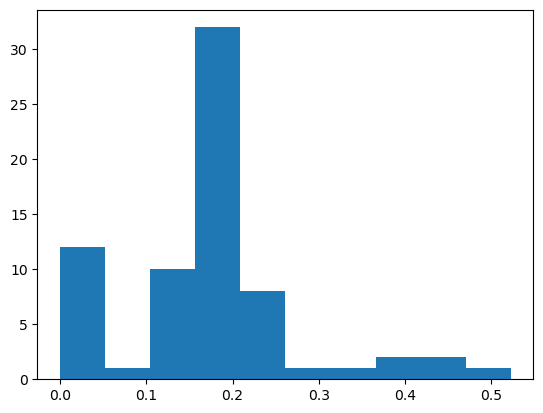

In [293]:
plt.hist(df_wb_new.isna().mean(axis=0))

- some variables have a high proportion of missing values

In [294]:
df_wb_new = df_wb_new.loc[:, df_wb_new.isnull().mean() < 0.4] # keep only variables with less than 40% missing values
df_wb_new

,Country Name,Country Code,Year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural land (% of land area),Agricultural land (sq. km),Alternative and nuclear energy (% of total energy use),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),...,Population density (people per sq. km of land area),Population in the largest city (% of urban population),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Total greenhouse gas emissions including LULUCF (Mt CO2e),Urban population,Urban population (% of total population),Urban population growth (annual %)
0,Albania,ALB,2017,99.9,99.7,100.0,42.856971,11742.810,16.98,-19.319499,...,96.652737,31.476941,13.5,17.7,9.1947,3.471945,10.5403,1482517.0,55.980276,-0.814539
1,Albania,ALB,2018,100.0,100.0,100.0,42.849672,11740.810,31.74,-19.728823,...,95.172737,32.348612,13.5,17.7,9.1911,3.524556,10.5367,1470162.0,56.377000,-0.836872
2,Albania,ALB,2019,100.0,100.0,100.0,42.846715,11740.000,19.80,-24.997366,...,93.715365,33.248444,14.2,18.6,8.6662,3.374950,10.0118,1457584.0,56.763907,-0.859233
3,Albania,ALB,2020,100.0,100.0,100.0,42.538504,11655.550,21.75,-31.263638,...,92.280292,34.171768,14.2,18.6,7.9972,3.162849,9.3428,1444795.0,57.140859,-0.881283
4,Albania,ALB,2021,100.0,100.0,100.0,41.471898,11363.300,34.43,-23.068125,...,90.867226,35.111904,14.2,18.6,8.4963,3.412495,9.8419,1431805.0,57.507719,-0.903156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,United Kingdom,GBR,2020,100.0,100.0,100.0,71.340049,172592.981,13.78,-45.126653,...,275.881453,16.815264,40.3,28.7,421.5411,6.315790,414.8624,55330777.0,82.900002,0.447347
348,United Kingdom,GBR,2021,100.0,100.0,100.0,71.157529,172151.410,12.03,-41.999609,...,276.873476,16.955878,39.9,27.8,437.8694,6.536925,431.0206,55589113.0,82.988643,0.465807
349,United Kingdom,GBR,2022,100.0,100.0,99.9,71.981642,174145.186,13.76,-44.217208,...,279.436201,16.987512,39.9,27.8,423.3672,6.262458,416.8073,56162292.0,83.075398,1.025820
350,United Kingdom,GBR,2023,100.0,100.0,100.0,70.307323,170094.506,13.35,-47.685802,...,283.106684,16.938966,39.9,27.8,400.6095,5.848997,394.5741,56958080.0,83.160193,1.406999


(array([10.,  3.,  0.,  8., 33.,  3.,  7.,  0.,  1.,  1.]),
 array([0.        , 0.03806818, 0.07613636, 0.11420455, 0.15227273,
        0.19034091, 0.22840909, 0.26647727, 0.30454545, 0.34261364,
        0.38068182]),
 <BarContainer object of 10 artists>)

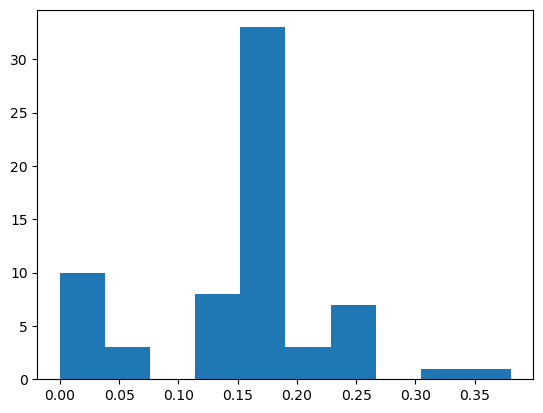

In [295]:
plt.hist(df_wb_new.isna().mean(axis=0))

In [296]:
df_wb_new.isna().sum().sum() # the total remaining missing values

np.int64(3429)

In [297]:
data = df_wb_new.dropna() # drop observations with missing values
data

,Country Name,Country Code,Year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural land (% of land area),Agricultural land (sq. km),Alternative and nuclear energy (% of total energy use),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),...,Population density (people per sq. km of land area),Population in the largest city (% of urban population),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Total greenhouse gas emissions including LULUCF (Mt CO2e),Urban population,Urban population (% of total population),Urban population growth (annual %)
0,Albania,ALB,2017,99.9,99.7,100.0,42.856971,11742.810,16.98,-19.319499,...,96.652737,31.476941,13.5,17.7,9.1947,3.471945,10.5403,1482517.0,55.980276,-0.814539
1,Albania,ALB,2018,100.0,100.0,100.0,42.849672,11740.810,31.74,-19.728823,...,95.172737,32.348612,13.5,17.7,9.1911,3.524556,10.5367,1470162.0,56.377000,-0.836872
2,Albania,ALB,2019,100.0,100.0,100.0,42.846715,11740.000,19.80,-24.997366,...,93.715365,33.248444,14.2,18.6,8.6662,3.374950,10.0118,1457584.0,56.763907,-0.859233
3,Albania,ALB,2020,100.0,100.0,100.0,42.538504,11655.550,21.75,-31.263638,...,92.280292,34.171768,14.2,18.6,7.9972,3.162849,9.3428,1444795.0,57.140859,-0.881283
24,Austria,AUT,2017,100.0,100.0,100.0,32.169413,26546.200,12.40,13.841043,...,106.611318,31.443867,28.4,28.4,84.8577,9.645588,80.2116,5973998.0,67.905120,0.964952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,United Kingdom,GBR,2017,100.0,100.0,100.0,72.195067,174661.525,13.75,-34.653844,...,272.665647,16.437220,28.9,28.7,490.8400,7.440803,483.8340,54244275.0,82.230657,0.798556
345,United Kingdom,GBR,2018,100.0,100.0,100.0,71.718520,173508.616,13.44,-35.826108,...,274.000744,16.552585,28.8,28.7,482.1680,7.273726,475.7582,54653004.0,82.446566,0.750672
346,United Kingdom,GBR,2019,100.0,100.0,100.0,72.422999,175212.961,12.97,-38.378254,...,275.414376,16.659215,29.0,28.7,464.7090,6.974366,458.1430,55083809.0,82.669942,0.785164
347,United Kingdom,GBR,2020,100.0,100.0,100.0,71.340049,172592.981,13.78,-45.126653,...,275.881453,16.815264,40.3,28.7,421.5411,6.315790,414.8624,55330777.0,82.900002,0.447347


In [298]:
data.isna().sum().sum()

np.int64(0)

In [299]:
data.dtypes

Country Name                                                                   object
Country Code                                                                   object
Year                                                                            int64
Access to electricity (% of population)                                       float64
Access to electricity, rural (% of rural population)                          float64
                                                                               ...   
Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)    float64
Total greenhouse gas emissions including LULUCF (Mt CO2e)                     float64
Urban population                                                              float64
Urban population (% of total population)                                      float64
Urban population growth (annual %)                                            float64
Length: 66, dtype: object

In [300]:
data.shape

(147, 66)

In [301]:
data.groupby("Country Name")["Year"].count().sort_values(ascending=True)

Country Name
Albania                   4
Bosnia and Herzegovina    4
North Macedonia           4
Belarus                   5
Belgium                   5
Bulgaria                  5
Croatia                   5
Austria                   5
Denmark                   5
Estonia                   5
France                    5
Germany                   5
Greece                    5
Hungary                   5
Ireland                   5
Czechia                   5
Italy                     5
Latvia                    5
Lithuania                 5
Netherlands               5
Norway                    5
Poland                    5
Portugal                  5
Romania                   5
Slovak Republic           5
Spain                     5
Sweden                    5
Switzerland               5
Ukraine                   5
United Kingdom            5
Name: Year, dtype: int64

In [302]:
data.columns

Index(['Country Name', 'Country Code', 'Year',
       'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Alternative and nuclear energy (% of total energy use)',
       'Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990)',
       'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)',
       'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
       'Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)',
       'Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e)',

### Statistical Anlysis

#### GDP per capita

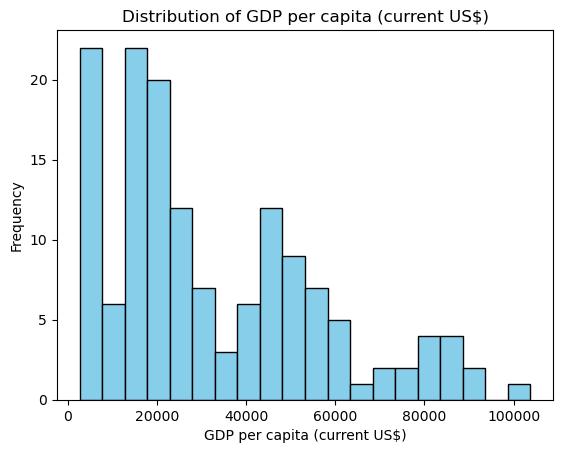

In [303]:
var = 'GDP per capita (current US$)'

plt.hist(data[var].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel(var)
plt.ylabel('Frequency')
plt.title(f'Distribution of {var}')
plt.show()

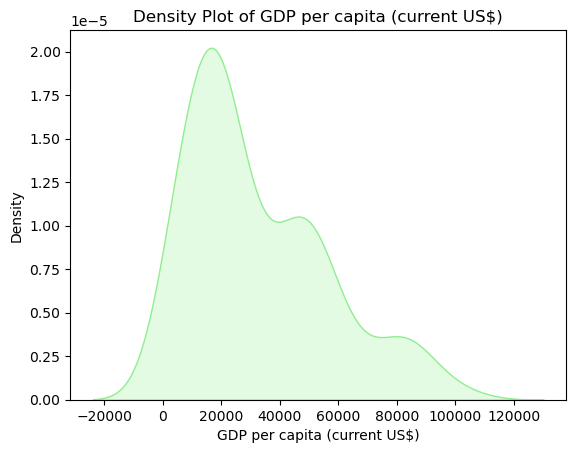

In [304]:
sns.kdeplot(data[var].dropna(), fill=True, color='lightgreen')
plt.title(f'Density Plot of {var}')
plt.show()

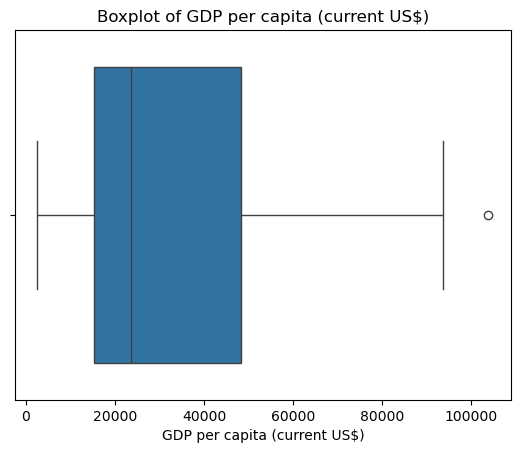

In [305]:
sns.boxplot(x=data[var])
plt.title(f'Boxplot of {var}')
plt.show()

In [306]:
from scipy.stats import shapiro

stat, p = shapiro(data[var].dropna())
print(f'Stat={stat:.3f}, p={p:.3f}')

if p > 0.05:
    print("Data looks normally distributed")
else:
    print("Data is not normally distributed")

Stat=0.903, p=0.000
Data is not normally distributed


In [307]:
from scipy.stats import kstest, norm
import numpy as np

# Standardize
x = (data[var].dropna() - np.mean(data[var].dropna())) / np.std(data[var].dropna())
stat, p = kstest(x, 'norm')
print(f'Stat={stat:.3f}, p={p:.3f}')

Stat=0.177, p=0.000


In [308]:
from scipy.stats import skew, kurtosis

print(f'Skewness: {skew(data[var].dropna()):.3f}')
print(f'Kurtosis: {kurtosis(data[var].dropna()):.3f}')

Skewness: 0.909
Kurtosis: 0.008


- right skewed (skewness > 0)
- kurtosis $\approx$ 0 $\Rightarrow$ normal

#### GDP per capita + Urban pop

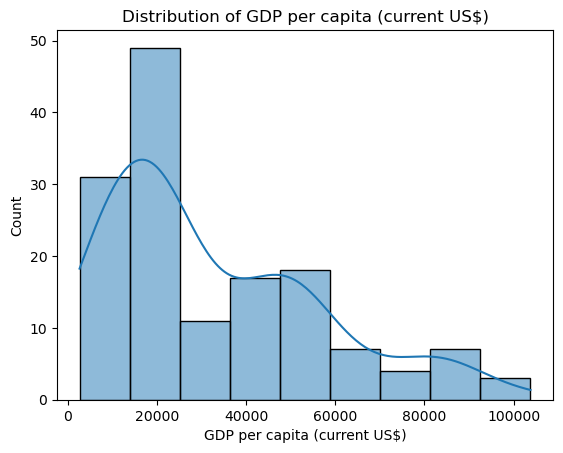

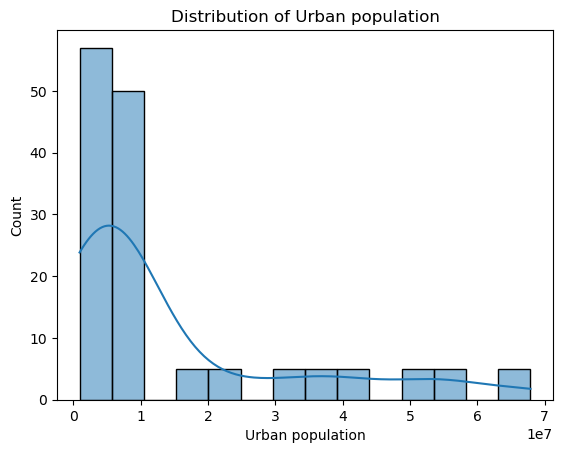

In [309]:
indicators = ['GDP per capita (current US$)', 'Urban population']

for var in indicators:
    sns.histplot(data[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

#### GDP aggregate

In [ ]:
data['GDP_per_capita_log'] = np.log1p(data['GDP per capita (current US$)'])

C:\Users\Radu\AppData\Local\Temp\ipykernel_7336\84573816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GDP_per_capita_log'] = np.log1p(data['GDP per capita (current US$)'])


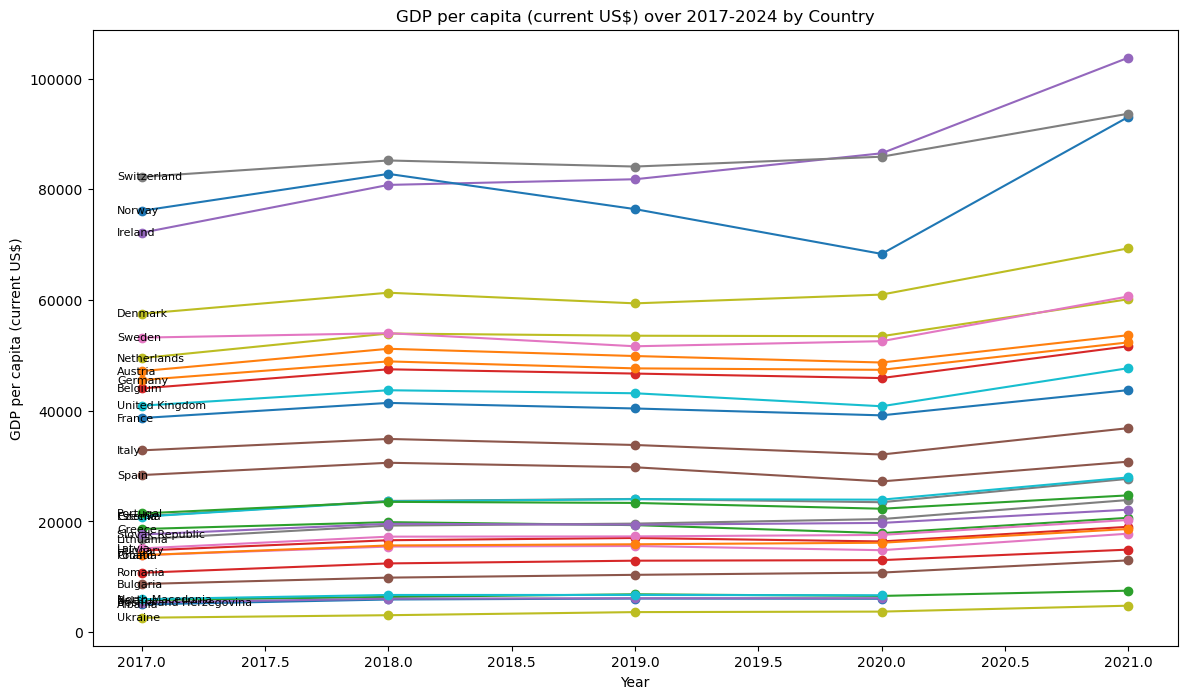

In [311]:
var = 'GDP per capita (current US$)'
countries = data['Country Name'].unique()

plt.figure(figsize=(14,8))

for country in countries:
    subset = data[data['Country Name'] == country]
    plt.plot(subset['Year'], subset[var], marker='o')
    
    # Add country name at the first year point
    plt.text(subset['Year'].iloc[0] - 0.1, subset[var].iloc[0], country,
             fontsize=8, verticalalignment='center')

plt.xlabel('Year')
plt.ylabel(var)
plt.title(f'{var} over 2017-2024 by Country')
plt.show()


#### GDP per country

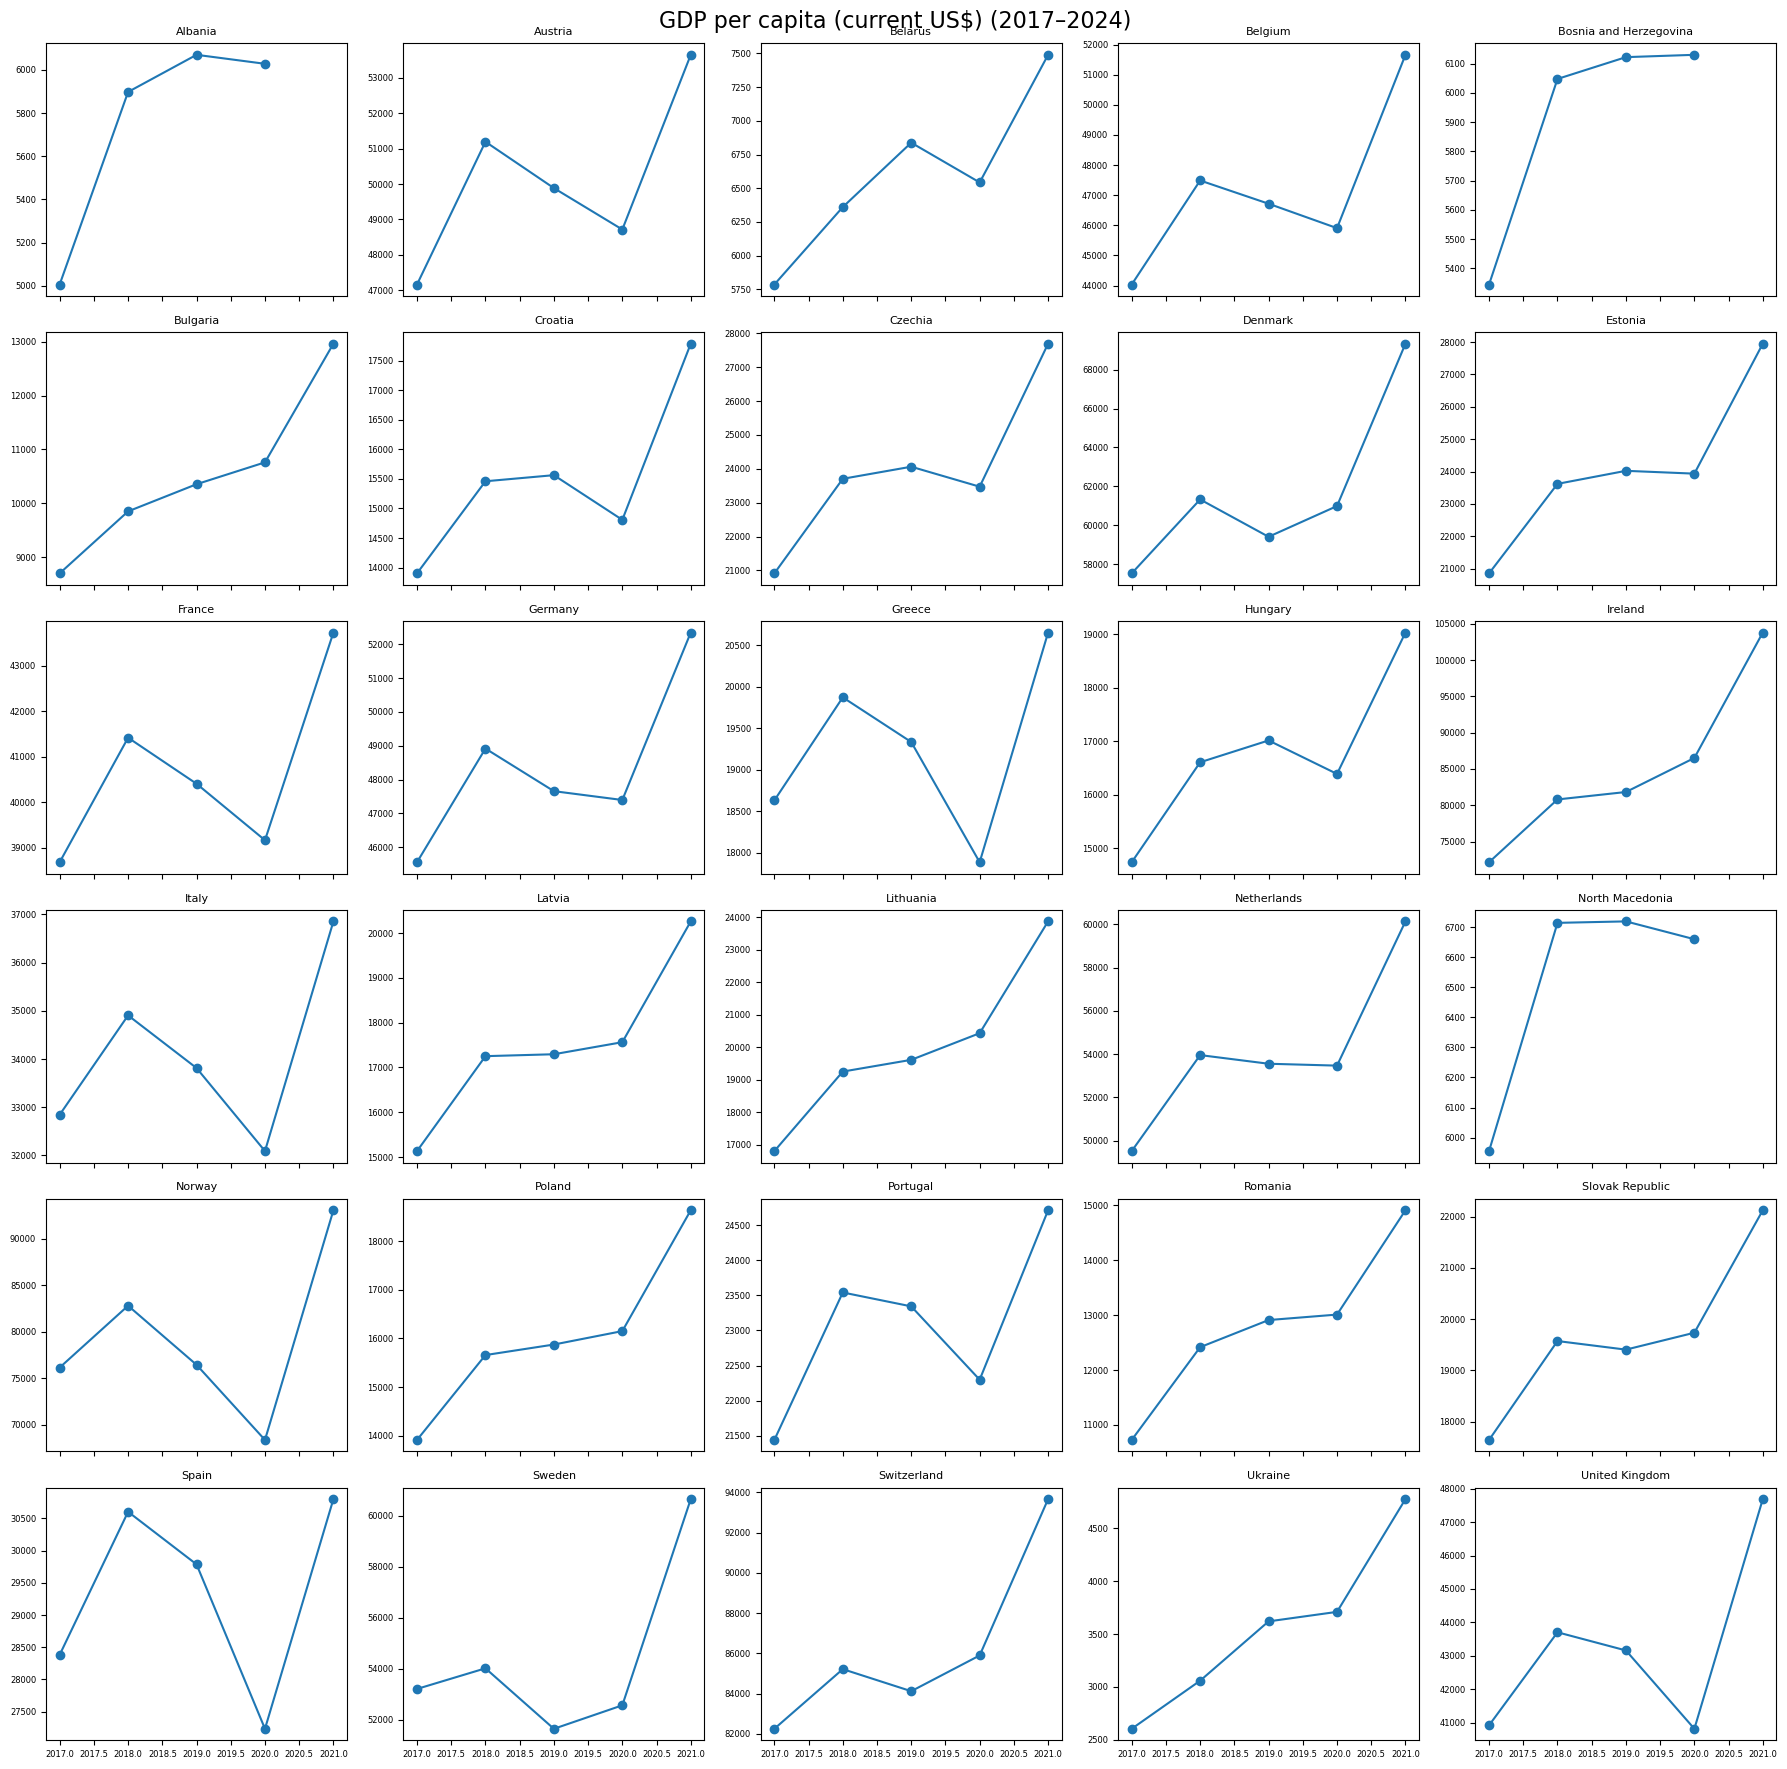

In [312]:
var = 'GDP per capita (current US$)'
countries = data['Country Name'].unique()

n = len(countries)

# Choose number of columns
cols = 5
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3), sharex=True, sharey=False) # sharey=False made the whole difference since now it analyses each lot, not every country having the same scale
axes = axes.flatten()

for i, country in enumerate(countries):
    subset = data[data['Country Name'] == country]
    
    axes[i].plot(subset['Year'], subset[var], marker='o')
    axes[i].set_title(country, fontsize=8)
    axes[i].tick_params(axis='both', labelsize=6)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(f'{var} (2017–2024)', fontsize=16)
plt.tight_layout()
plt.show()

#### Urban pop aggregate

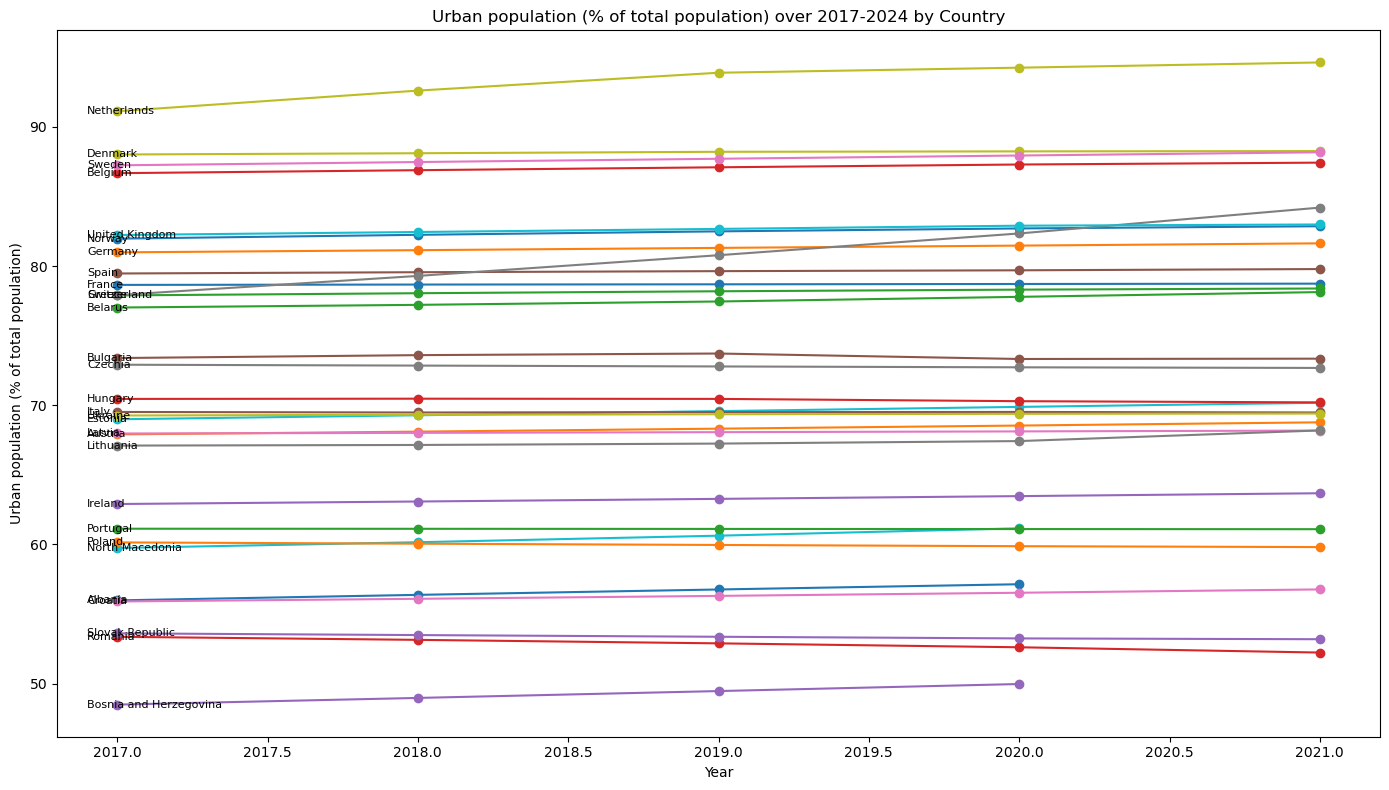

In [313]:
var = 'Urban population (% of total population)' 
countries = data['Country Name'].unique()

plt.figure(figsize=(14,8))

for country in countries:
    subset = data[data['Country Name'] == country]
    plt.plot(subset['Year'], subset[var], marker='o')
    
    # Add country name at the first year
    plt.text(subset['Year'].iloc[0] - 0.1, subset[var].iloc[0], country,
             fontsize=8, verticalalignment='center')

plt.xlabel('Year')
plt.ylabel(var)
plt.title(f'{var} over 2017-2024 by Country')
plt.tight_layout()
plt.show()

#### Urban pop per country

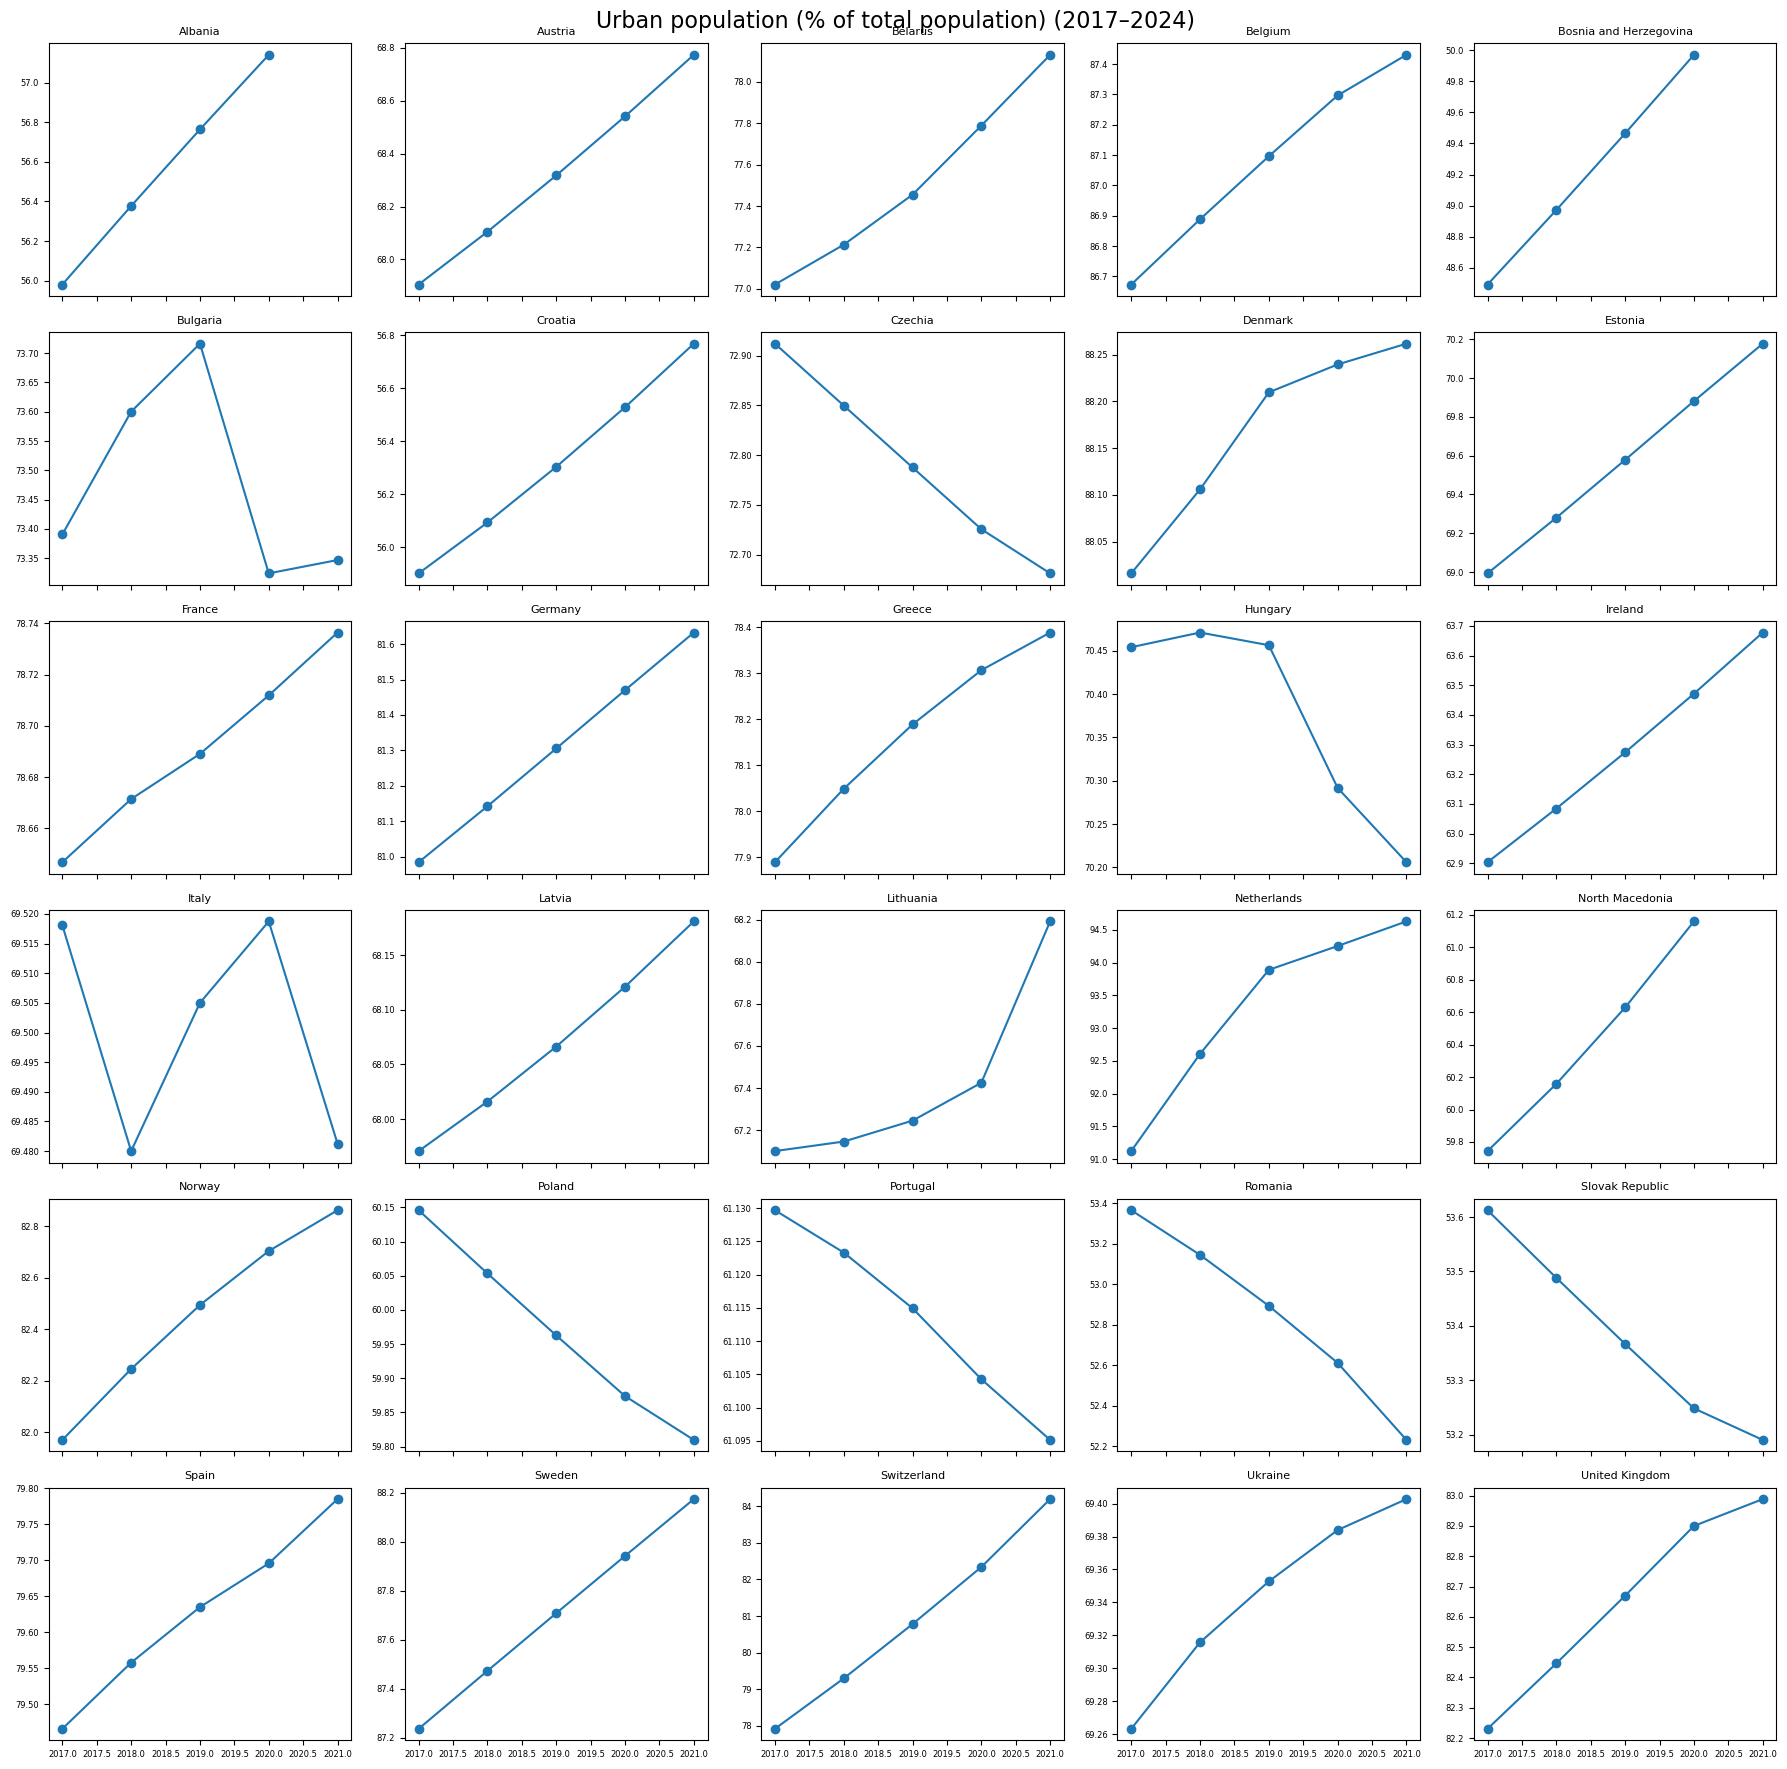

In [314]:
var = 'Urban population (% of total population)' 
countries = data['Country Name'].unique()

n = len(countries)

# Choose number of columns
cols = 5
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3), sharex=True, sharey=False) # sharey=False made the whole difference since now it analyses each lot, not every country having the same scale
axes = axes.flatten()

for i, country in enumerate(countries):
    subset = data[data['Country Name'] == country]
    
    axes[i].plot(subset['Year'], subset[var], marker='o')
    axes[i].set_title(country, fontsize=8)
    axes[i].tick_params(axis='both', labelsize=6)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(f'{var} (2017–2024)', fontsize=16)
plt.tight_layout()
plt.show()

In [315]:
print(sorted(data['Year'].unique()))

[np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021)]


- check the obs that were droped because of nan values, 3 years are not in the analysis annymore

### Work with pollution indicators

In [316]:
pollution_cols = [
    'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
    'Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)',
    'Nitrous oxide (N2O) emissions from Agriculture (Mt CO2e)',
    'Total greenhouse gas emissions excluding LULUCF (Mt CO2e)',
    'Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)'
]

# Select subset
pollution_data = df_wb_new[['Country Name', 'Country Code', 'Year'] + pollution_cols]

pollution_data

,Country Name,Country Code,Year,Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e),Nitrous oxide (N2O) emissions from Agriculture (Mt CO2e),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)
0,Albania,ALB,2017,5.3613,2.024442,2.7294,0.7586,9.1947,3.471945
1,Albania,ALB,2018,5.3341,2.045493,2.7526,0.7371,9.1911,3.524556
2,Albania,ALB,2019,4.9840,1.940960,2.5424,0.7606,8.6662,3.374950
3,Albania,ALB,2020,4.5676,1.806461,2.3584,0.6855,7.9972,3.162849
4,Albania,ALB,2021,5.1122,2.053289,2.3172,0.6575,8.4963,3.412495
...,...,...,...,...,...,...,...,...,...
347,United Kingdom,GBR,2020,319.6964,4.789890,62.7140,20.0874,421.5411,6.315790
348,United Kingdom,GBR,2021,337.9148,5.044709,61.6947,19.5833,437.8694,6.536925
349,United Kingdom,GBR,2022,324.9949,4.807332,60.7494,19.7898,423.3672,6.262458
350,United Kingdom,GBR,2023,304.7866,4.449959,59.4471,19.4186,400.6095,5.848997


In [317]:
pollution_data.isna().sum()

Country Name                                                                   0
Country Code                                                                   0
Year                                                                           0
Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)             56
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)    56
Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)                    56
Nitrous oxide (N2O) emissions from Agriculture (Mt CO2e)                      56
Total greenhouse gas emissions excluding LULUCF (Mt CO2e)                     56
Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)    56
dtype: int64

In [318]:
pollution_data[pollution_data.isna().any(axis=1)]

,Country Name,Country Code,Year,Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e),Nitrous oxide (N2O) emissions from Agriculture (Mt CO2e),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)
8,Andorra,AND,2017,NaN,NaN,NaN,NaN,NaN,NaN
9,Andorra,AND,2018,NaN,NaN,NaN,NaN,NaN,NaN
10,Andorra,AND,2019,NaN,NaN,NaN,NaN,NaN,NaN
11,Andorra,AND,2020,NaN,NaN,NaN,NaN,NaN,NaN
12,Andorra,AND,2021,NaN,NaN,NaN,NaN,NaN,NaN
13,Andorra,AND,2022,NaN,NaN,NaN,NaN,NaN,NaN
14,Andorra,AND,2023,NaN,NaN,NaN,NaN,NaN,NaN
15,Andorra,AND,2024,NaN,NaN,NaN,NaN,NaN,NaN
160,Kosovo,XKX,2017,NaN,NaN,NaN,NaN,NaN,NaN
161,Kosovo,XKX,2018,NaN,NaN,NaN,NaN,NaN,NaN


- Andorra, Kosovo, Liechtenstein, Monaco, Montenegro, san Marino and Serbia have missing values for the selected pollution indicators

In [319]:
pollution_data_clean = pollution_data.dropna()
pollution_data_clean.isna().sum().sum()

np.int64(0)

In [320]:
pollution_data_clean

,Country Name,Country Code,Year,Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e),Nitrous oxide (N2O) emissions from Agriculture (Mt CO2e),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)
0,Albania,ALB,2017,5.3613,2.024442,2.7294,0.7586,9.1947,3.471945
1,Albania,ALB,2018,5.3341,2.045493,2.7526,0.7371,9.1911,3.524556
2,Albania,ALB,2019,4.9840,1.940960,2.5424,0.7606,8.6662,3.374950
3,Albania,ALB,2020,4.5676,1.806461,2.3584,0.6855,7.9972,3.162849
4,Albania,ALB,2021,5.1122,2.053289,2.3172,0.6575,8.4963,3.412495
...,...,...,...,...,...,...,...,...,...
347,United Kingdom,GBR,2020,319.6964,4.789890,62.7140,20.0874,421.5411,6.315790
348,United Kingdom,GBR,2021,337.9148,5.044709,61.6947,19.5833,437.8694,6.536925
349,United Kingdom,GBR,2022,324.9949,4.807332,60.7494,19.7898,423.3672,6.262458
350,United Kingdom,GBR,2023,304.7866,4.449959,59.4471,19.4186,400.6095,5.848997


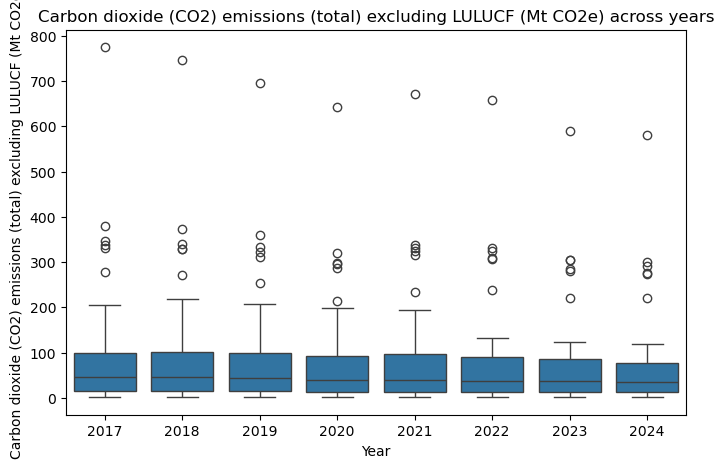

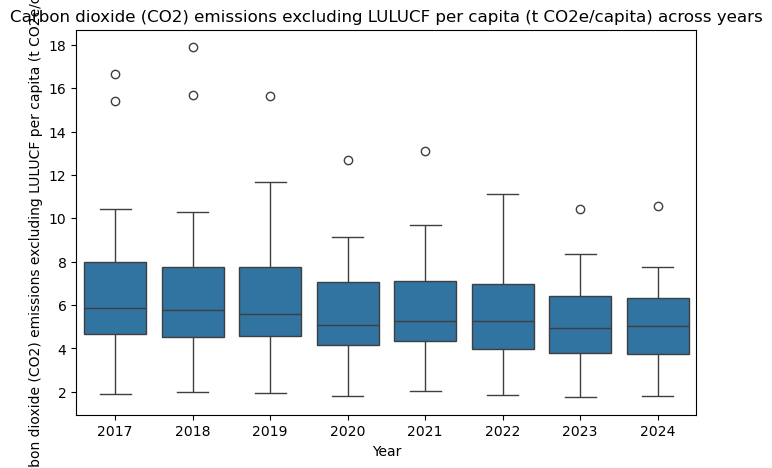

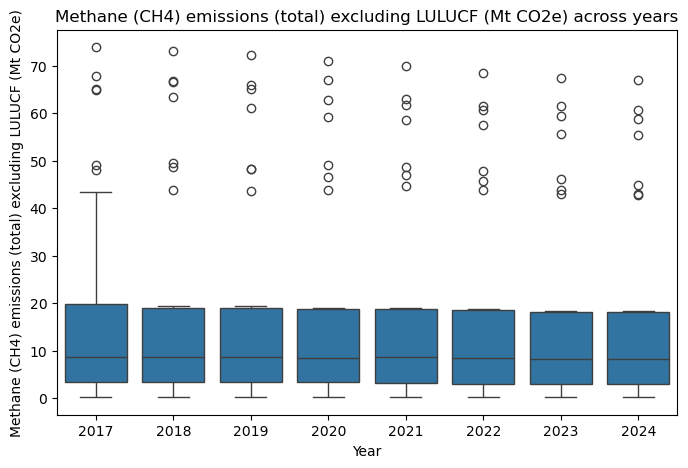

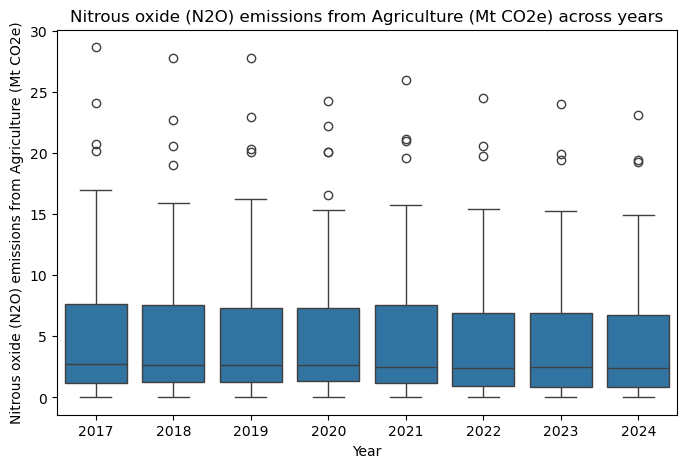

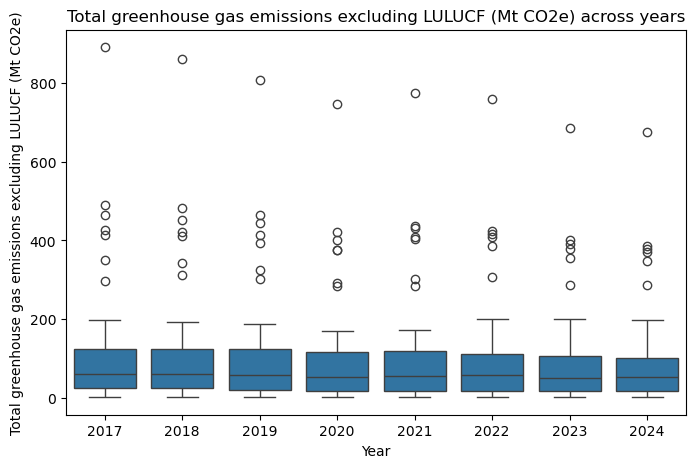

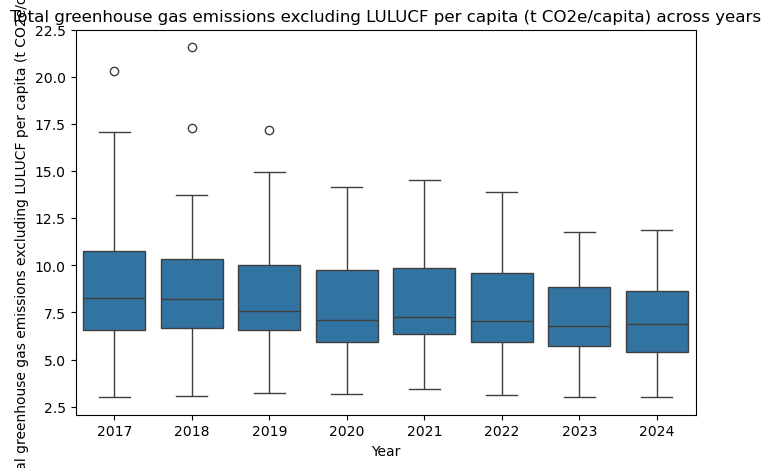

In [321]:
for col in pollution_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Year', y=col, data=pollution_data)
    plt.title(f'{col} across years')
    plt.show()

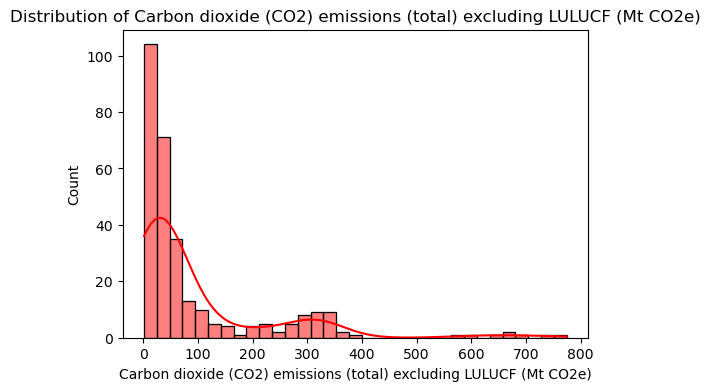

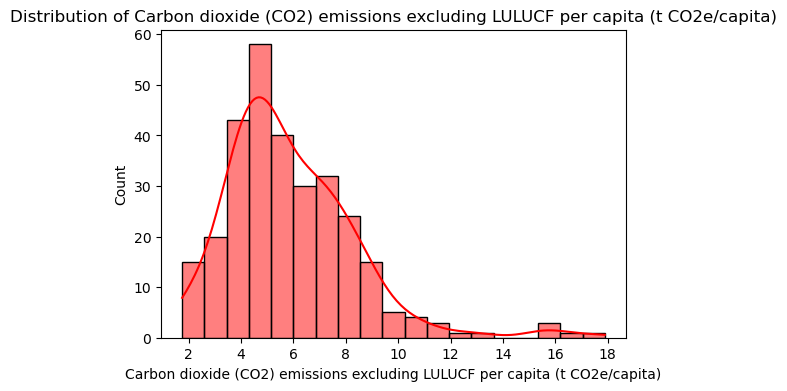

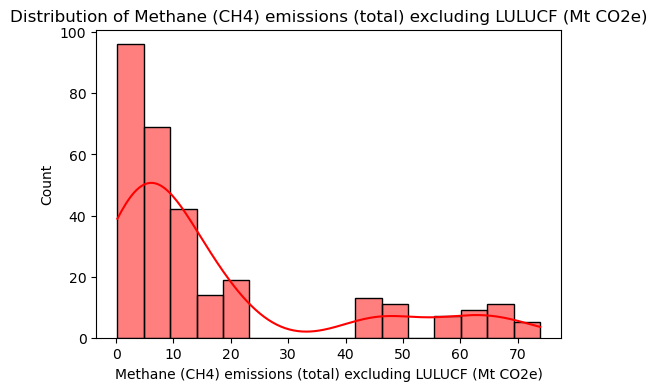

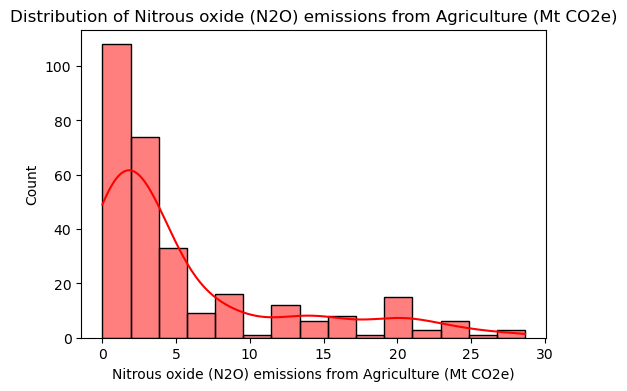

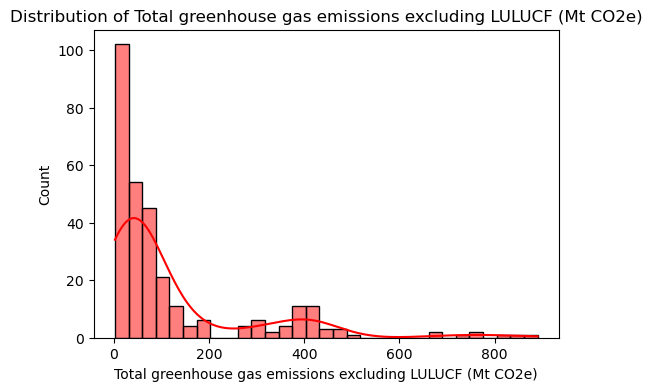

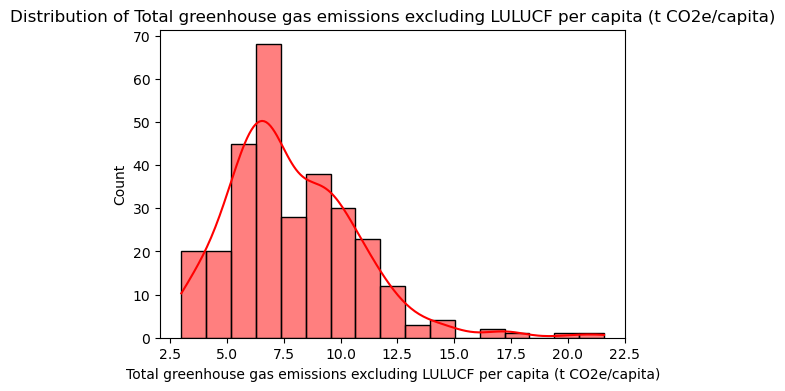

In [322]:
for col in pollution_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(pollution_data[col].dropna(), kde=True, color='red')
    plt.title(f'Distribution of {col}')
    plt.show()

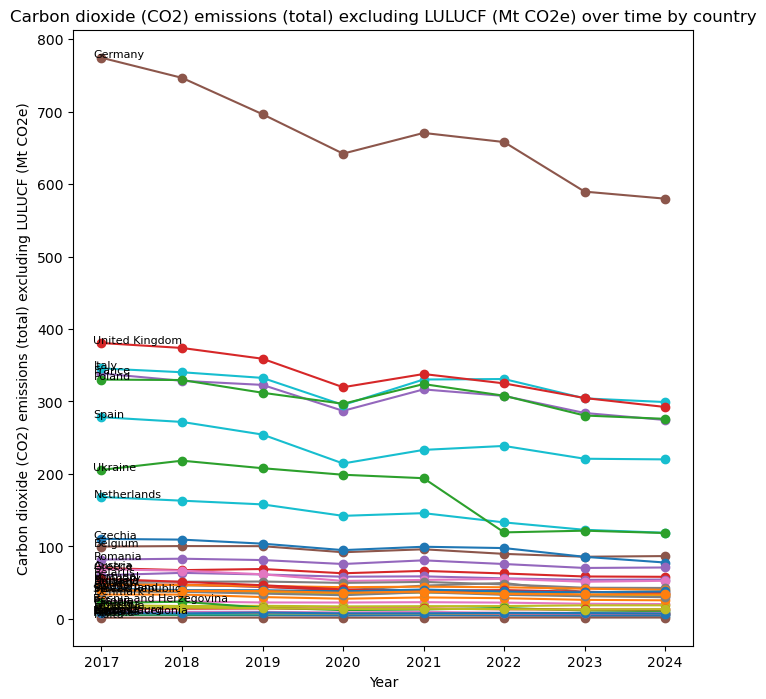

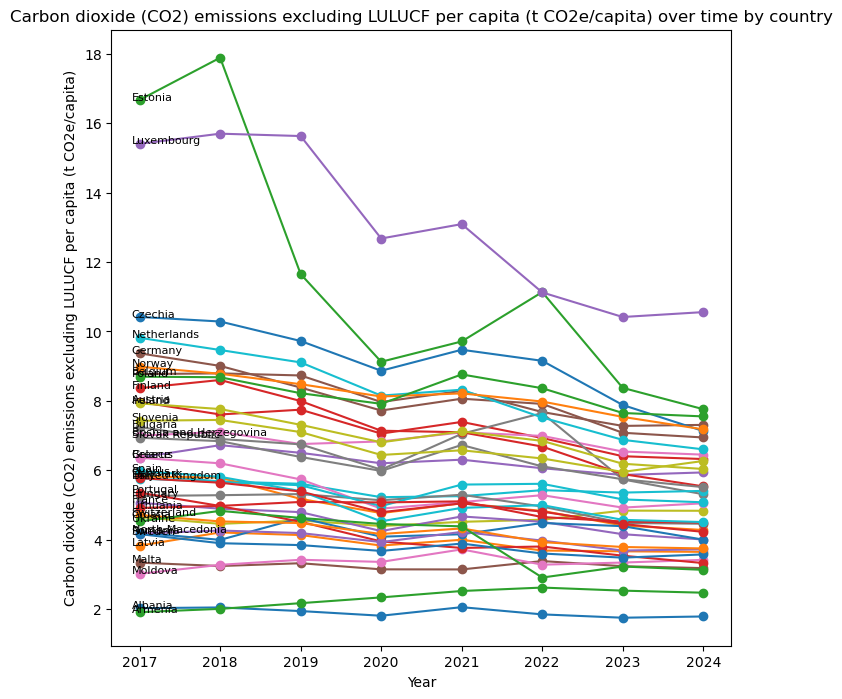

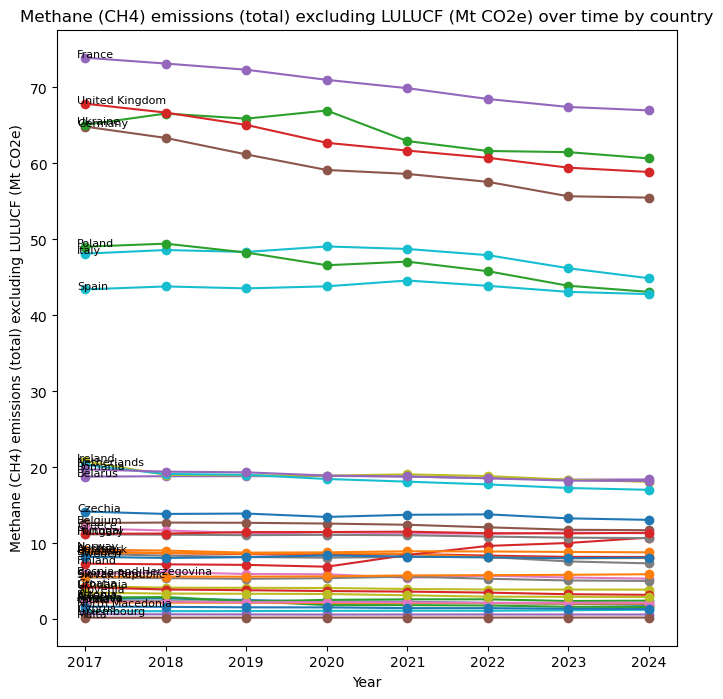

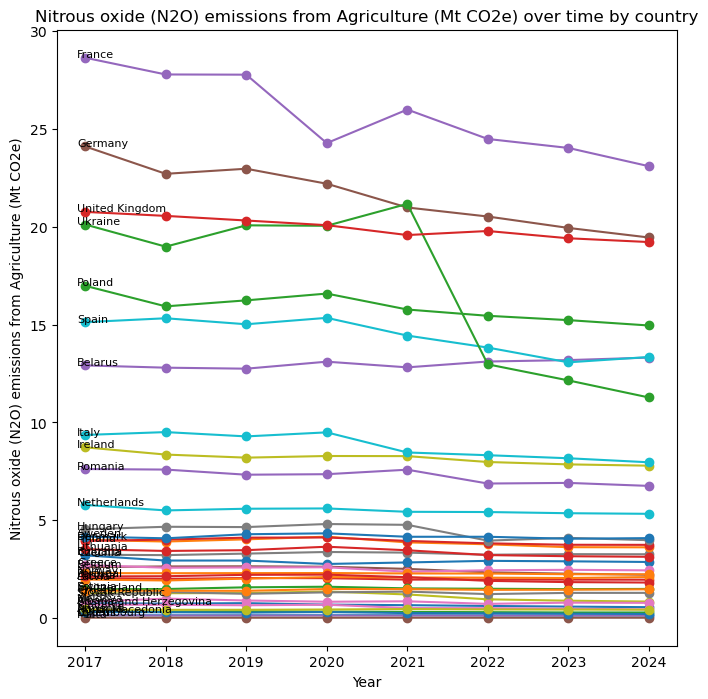

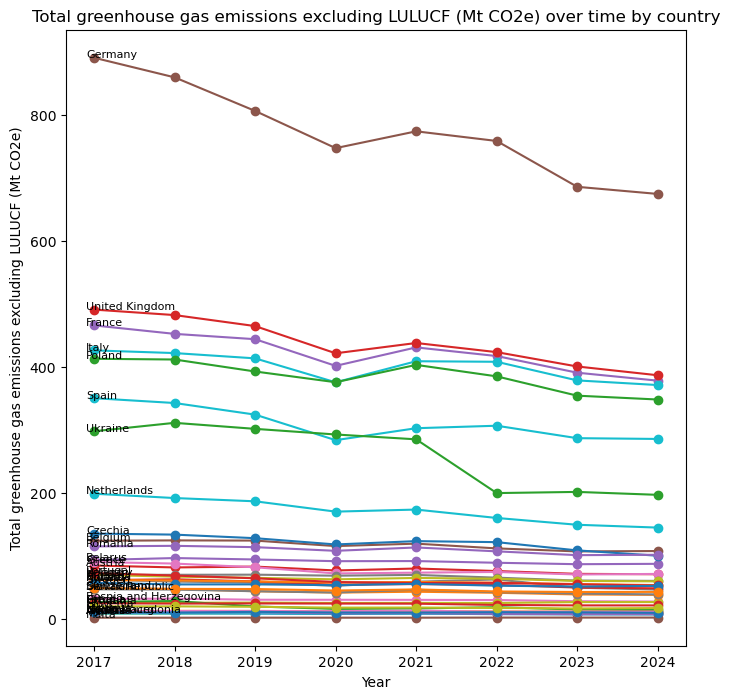

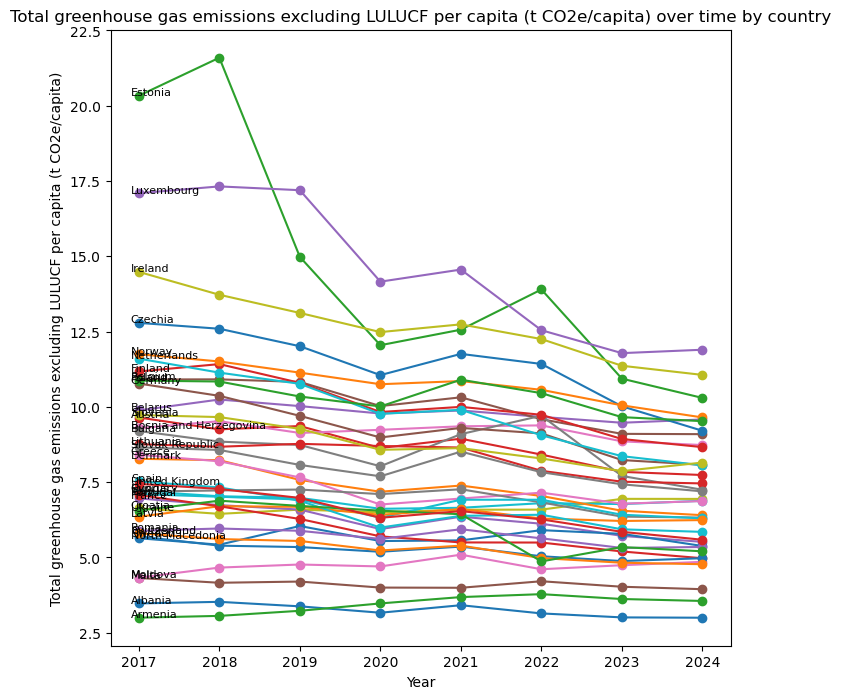

In [323]:
for col in pollution_cols:
    plt.figure(figsize=(8,8))
    for country in pollution_data['Country Name'].unique():
        subset = pollution_data[pollution_data['Country Name'] == country].sort_values('Year')
        plt.plot(subset['Year'], subset[col], marker='o')
        plt.text(subset['Year'].iloc[0]-0.1, subset[col].iloc[0], country, fontsize=8)
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.title(f'{col} over time by country')
    plt.show()

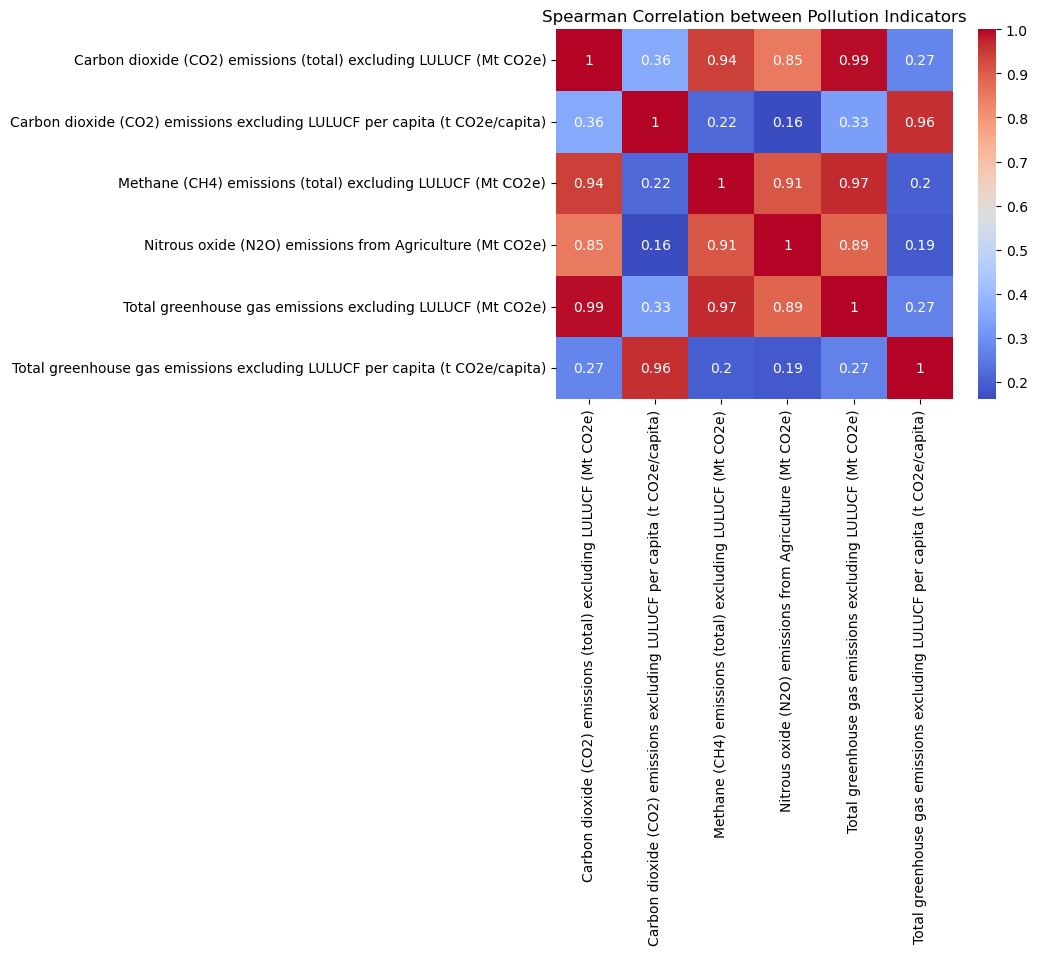

In [324]:
corr_matrix = pollution_data[pollution_cols].corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation between Pollution Indicators')
plt.show()

### PCA

#### Standardize

In [325]:
data

,Country Name,Country Code,Year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural land (% of land area),Agricultural land (sq. km),Alternative and nuclear energy (% of total energy use),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),...,Population in the largest city (% of urban population),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Total greenhouse gas emissions including LULUCF (Mt CO2e),Urban population,Urban population (% of total population),Urban population growth (annual %),GDP_per_capita_log
0,Albania,ALB,2017,99.9,99.7,100.0,42.856971,11742.810,16.98,-19.319499,...,31.476941,13.5,17.7,9.1947,3.471945,10.5403,1482517.0,55.980276,-0.814539,8.518664
1,Albania,ALB,2018,100.0,100.0,100.0,42.849672,11740.810,31.74,-19.728823,...,32.348612,13.5,17.7,9.1911,3.524556,10.5367,1470162.0,56.377000,-0.836872,8.682480
2,Albania,ALB,2019,100.0,100.0,100.0,42.846715,11740.000,19.80,-24.997366,...,33.248444,14.2,18.6,8.6662,3.374950,10.0118,1457584.0,56.763907,-0.859233,8.711186
3,Albania,ALB,2020,100.0,100.0,100.0,42.538504,11655.550,21.75,-31.263638,...,34.171768,14.2,18.6,7.9972,3.162849,9.3428,1444795.0,57.140859,-0.881283,8.704322
24,Austria,AUT,2017,100.0,100.0,100.0,32.169413,26546.200,12.40,13.841043,...,31.443867,28.4,28.4,84.8577,9.645588,80.2116,5973998.0,67.905120,0.964952,10.761402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,United Kingdom,GBR,2017,100.0,100.0,100.0,72.195067,174661.525,13.75,-34.653844,...,16.437220,28.9,28.7,490.8400,7.440803,483.8340,54244275.0,82.230657,0.798556,10.619321
345,United Kingdom,GBR,2018,100.0,100.0,100.0,71.718520,173508.616,13.44,-35.826108,...,16.552585,28.8,28.7,482.1680,7.273726,475.7582,54653004.0,82.446566,0.750672,10.685195
346,United Kingdom,GBR,2019,100.0,100.0,100.0,72.422999,175212.961,12.97,-38.378254,...,16.659215,29.0,28.7,464.7090,6.974366,458.1430,55083809.0,82.669942,0.785164,10.672663
347,United Kingdom,GBR,2020,100.0,100.0,100.0,71.340049,172592.981,13.78,-45.126653,...,16.815264,40.3,28.7,421.5411,6.315790,414.8624,55330777.0,82.900002,0.447347,10.616773


In [326]:
print('Number of observations (n):', len(data))
p = len(data.columns[2:])  # the first two columns are the names and code of the countries
print('Number of features (p):', p)

Number of observations (n): 147
Number of features (p): 65


In [327]:
data.dtypes

Country Name                                                  object
Country Code                                                  object
Year                                                           int64
Access to electricity (% of population)                      float64
Access to electricity, rural (% of rural population)         float64
                                                              ...   
Total greenhouse gas emissions including LULUCF (Mt CO2e)    float64
Urban population                                             float64
Urban population (% of total population)                     float64
Urban population growth (annual %)                           float64
GDP_per_capita_log                                           float64
Length: 67, dtype: object

In [328]:
numeric_cols = data.select_dtypes(include=["number"]).columns

data = data[data.columns[:2].tolist() + numeric_cols.tolist()].copy()

data

,Country Name,Country Code,Year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural land (% of land area),Agricultural land (sq. km),Alternative and nuclear energy (% of total energy use),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),...,Population in the largest city (% of urban population),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Total greenhouse gas emissions including LULUCF (Mt CO2e),Urban population,Urban population (% of total population),Urban population growth (annual %),GDP_per_capita_log
0,Albania,ALB,2017,99.9,99.7,100.0,42.856971,11742.810,16.98,-19.319499,...,31.476941,13.5,17.7,9.1947,3.471945,10.5403,1482517.0,55.980276,-0.814539,8.518664
1,Albania,ALB,2018,100.0,100.0,100.0,42.849672,11740.810,31.74,-19.728823,...,32.348612,13.5,17.7,9.1911,3.524556,10.5367,1470162.0,56.377000,-0.836872,8.682480
2,Albania,ALB,2019,100.0,100.0,100.0,42.846715,11740.000,19.80,-24.997366,...,33.248444,14.2,18.6,8.6662,3.374950,10.0118,1457584.0,56.763907,-0.859233,8.711186
3,Albania,ALB,2020,100.0,100.0,100.0,42.538504,11655.550,21.75,-31.263638,...,34.171768,14.2,18.6,7.9972,3.162849,9.3428,1444795.0,57.140859,-0.881283,8.704322
24,Austria,AUT,2017,100.0,100.0,100.0,32.169413,26546.200,12.40,13.841043,...,31.443867,28.4,28.4,84.8577,9.645588,80.2116,5973998.0,67.905120,0.964952,10.761402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,United Kingdom,GBR,2017,100.0,100.0,100.0,72.195067,174661.525,13.75,-34.653844,...,16.437220,28.9,28.7,490.8400,7.440803,483.8340,54244275.0,82.230657,0.798556,10.619321
345,United Kingdom,GBR,2018,100.0,100.0,100.0,71.718520,173508.616,13.44,-35.826108,...,16.552585,28.8,28.7,482.1680,7.273726,475.7582,54653004.0,82.446566,0.750672,10.685195
346,United Kingdom,GBR,2019,100.0,100.0,100.0,72.422999,175212.961,12.97,-38.378254,...,16.659215,29.0,28.7,464.7090,6.974366,458.1430,55083809.0,82.669942,0.785164,10.672663
347,United Kingdom,GBR,2020,100.0,100.0,100.0,71.340049,172592.981,13.78,-45.126653,...,16.815264,40.3,28.7,421.5411,6.315790,414.8624,55330777.0,82.900002,0.447347,10.616773


In [329]:
data.shape

(147, 67)

PCA finds a low-dimensional representation of a data set that contains as much as possile of the variation. Each of the $n$ observations lives in a $p$-dimensional space, but not all of these dimensions are equally interesting. PCA finds a small number of dimensions that are as interesting as possible, where the concept of "interesting" is measured by the amount that the observations vary along each dimension. Each of the dimenasions found by PCA is a linear combination of the $p$ features

- for PCA, a very important step in the pre-processing of the data is centering it around 0 $\rightarrow$ we can do that using the `StandardScaler` function from sklearn (StandardScaler not only removes the mean, but also reduces the data to unit variance)

In [330]:
data

,Country Name,Country Code,Year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural land (% of land area),Agricultural land (sq. km),Alternative and nuclear energy (% of total energy use),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),...,Population in the largest city (% of urban population),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Total greenhouse gas emissions including LULUCF (Mt CO2e),Urban population,Urban population (% of total population),Urban population growth (annual %),GDP_per_capita_log
0,Albania,ALB,2017,99.9,99.7,100.0,42.856971,11742.810,16.98,-19.319499,...,31.476941,13.5,17.7,9.1947,3.471945,10.5403,1482517.0,55.980276,-0.814539,8.518664
1,Albania,ALB,2018,100.0,100.0,100.0,42.849672,11740.810,31.74,-19.728823,...,32.348612,13.5,17.7,9.1911,3.524556,10.5367,1470162.0,56.377000,-0.836872,8.682480
2,Albania,ALB,2019,100.0,100.0,100.0,42.846715,11740.000,19.80,-24.997366,...,33.248444,14.2,18.6,8.6662,3.374950,10.0118,1457584.0,56.763907,-0.859233,8.711186
3,Albania,ALB,2020,100.0,100.0,100.0,42.538504,11655.550,21.75,-31.263638,...,34.171768,14.2,18.6,7.9972,3.162849,9.3428,1444795.0,57.140859,-0.881283,8.704322
24,Austria,AUT,2017,100.0,100.0,100.0,32.169413,26546.200,12.40,13.841043,...,31.443867,28.4,28.4,84.8577,9.645588,80.2116,5973998.0,67.905120,0.964952,10.761402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,United Kingdom,GBR,2017,100.0,100.0,100.0,72.195067,174661.525,13.75,-34.653844,...,16.437220,28.9,28.7,490.8400,7.440803,483.8340,54244275.0,82.230657,0.798556,10.619321
345,United Kingdom,GBR,2018,100.0,100.0,100.0,71.718520,173508.616,13.44,-35.826108,...,16.552585,28.8,28.7,482.1680,7.273726,475.7582,54653004.0,82.446566,0.750672,10.685195
346,United Kingdom,GBR,2019,100.0,100.0,100.0,72.422999,175212.961,12.97,-38.378254,...,16.659215,29.0,28.7,464.7090,6.974366,458.1430,55083809.0,82.669942,0.785164,10.672663
347,United Kingdom,GBR,2020,100.0,100.0,100.0,71.340049,172592.981,13.78,-45.126653,...,16.815264,40.3,28.7,421.5411,6.315790,414.8624,55330777.0,82.900002,0.447347,10.616773


In [331]:
# separates the actual features from the country codes and names
country_names = data.iloc[:, 0]
country_codes = data.iloc[:, 1]
year = data.iloc[:, 2]
features = data.iloc[:, 3:]

# standardize the features
scaler = StandardScaler() # substract mean and devide by sd
features_scaled = scaler.fit_transform(features)

In [332]:
# perform PCA on all components
pca = PCA()
transformed_data = pca.fit_transform(features_scaled)

- PCA was performed on the standardized dataset with 64 features
- the number of components can be at most $min(n, p)$, which in this case is $p$ = 64

In [333]:
transformed_data.shape

(147, 64)

In [334]:
loadings = pca.components_ # loading vactors, for each c and r, all combinations
print(loadings.shape)

(64, 64)


- the loading vectors of each components
- we have 64 $p$ = 64 - dimensional loading vectors (one per component), meaning in general we have n_components loading vectors of dimension $p$ =number of features

#### Princpal Components 

In [335]:
loading_df = pd.DataFrame(
    loadings.T,  # transpose to get features as rows
    columns=[f'PC{i+1}' for i in range(loadings.shape[0])],
    index=data.columns[3:] 
)
loading_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
Access to electricity (% of population),0.023454,0.103476,-0.000426,-0.184962,0.161724,0.470997,0.071097,0.084933,-0.072844,0.041977,...,0.011042,-0.001810,-0.012178,-0.007141,0.002118,-6.237287e-06,-1.189226e-06,-2.763996e-07,0.000000e+00,0.000000e+00
"Access to electricity, rural (% of rural population)",0.022657,0.102565,-0.003430,-0.189153,0.154531,0.468156,0.070554,0.062239,-0.079821,0.056300,...,-0.005089,-0.001494,0.006983,0.014952,-0.001894,2.464154e-06,6.290469e-07,2.421596e-07,-7.799144e-16,5.130899e-17
"Access to electricity, urban (% of urban population)",0.023777,0.108197,0.002272,-0.169884,0.172928,0.459119,0.055155,0.122961,-0.066916,0.029062,...,-0.007079,0.003525,0.004962,-0.007325,-0.000484,9.957723e-07,-3.621202e-07,1.037071e-08,6.918693e-16,-6.882606e-17
Agricultural land (% of land area),0.060766,-0.142512,-0.164127,-0.279955,0.132319,-0.171580,0.100022,-0.017765,-0.007880,0.003397,...,0.025472,0.027116,0.040299,0.029919,0.010080,-1.144797e-04,3.035618e-06,-7.626213e-07,5.432823e-16,-1.669522e-16
Agricultural land (sq. km),0.139935,-0.179031,0.110656,-0.050508,0.177930,-0.035781,0.057285,-0.009551,0.005458,0.022595,...,-0.163209,-0.017089,-0.366634,-0.104312,-0.061794,2.522305e-04,-5.605002e-07,9.263082e-08,-1.950252e-15,1.388269e-15


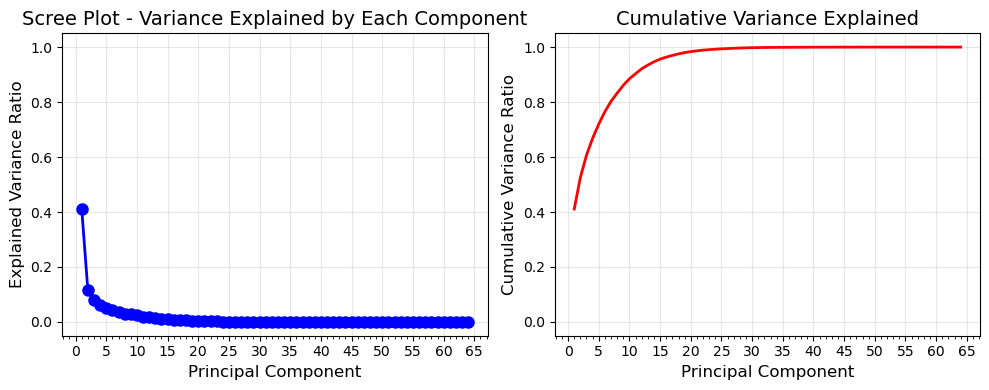

In [336]:
# create scree plot with separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

components = range(1, len(pca.explained_variance_ratio_) + 1)

# individual variance subplot
ax1.plot(components, pca.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Scree Plot - Variance Explained by Each Component', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.xaxis.set_major_locator(plt.MultipleLocator(5))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax1.set_ylim(-0.05,1.05)

# cumulative variance subplot
ax2.plot(components, np.cumsum(pca.explained_variance_ratio_), 'r-', 
         linewidth=2, markersize=8)
ax2.set_xlabel('Principal Component', fontsize=12)
ax2.set_ylabel('Cumulative Variance Ratio', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.xaxis.set_major_locator(plt.MultipleLocator(5))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax2.set_ylim(-0.05,1.05)


plt.tight_layout()
plt.show()

In [337]:
print(f"Total number of components: {len(pca.explained_variance_ratio_)}")

print(f"\nVariance explained by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Variance explained by PC3: {pca.explained_variance_ratio_[2]:.2%}")
print(f"Variance explained by PC4: {pca.explained_variance_ratio_[3]:.2%}")
print(f"Variance explained by PC5: {pca.explained_variance_ratio_[4]:.2%}")
print("...")
print(" ")
print(f"Total variance explained by PC1 and PC2: {sum(pca.explained_variance_ratio_[:2]):.2%}")
print(f"Total variance explained by PC1 and PC2 and PC3: {sum(pca.explained_variance_ratio_[:3]):.2%}")
print(f"Total variance explained by PC1 and PC2 and PC3 and PC4: {sum(pca.explained_variance_ratio_[:4]):.2%}")
print(f"Total variance explained by PC1 and PC2 and PC3 and PC4 and PC5: {sum(pca.explained_variance_ratio_[:5]):.2%}")
print("...")

Total number of components: 64

Variance explained by PC1: 41.08%
Variance explained by PC2: 11.51%
Variance explained by PC3: 8.10%
Variance explained by PC4: 6.15%
Variance explained by PC5: 5.16%
...
 
Total variance explained by PC1 and PC2: 52.58%
Total variance explained by PC1 and PC2 and PC3: 60.68%
Total variance explained by PC1 and PC2 and PC3 and PC4: 66.84%
Total variance explained by PC1 and PC2 and PC3 and PC4 and PC5: 72.00%
...


- from the scree plot we can see that the first principal component explains 41.08% of the total variance, and the second one explains 11.51% ( the third one 8.1%, the fourth one 6.15%)

- the first two components together explain 52.58% (> 50%) of the total variance $\Rightarrow$ most of the variance in the data can be explained in 2D (low-dimensional representation), a good tradeoff between number of components and information captured

- from cumulative plot we can see that to explain 100% of the total variance we need 25 components

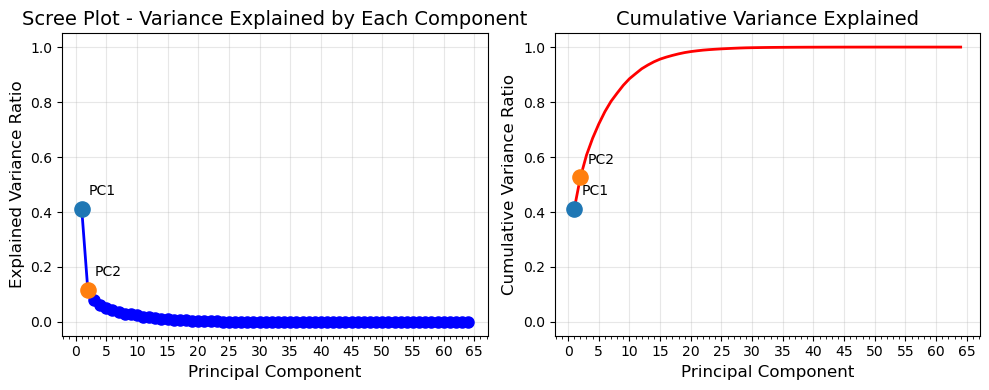

In [338]:
# create scree plot with separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

components = range(1, len(pca.explained_variance_ratio_) + 1)

# individual variance subplot
ax1.plot(components, pca.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Scree Plot - Variance Explained by Each Component', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.xaxis.set_major_locator(plt.MultipleLocator(5))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax1.set_ylim(-0.05,1.05)

# cumulative variance subplot
ax2.plot(components, np.cumsum(pca.explained_variance_ratio_), 'r-', 
         linewidth=2, markersize=8)
ax2.set_xlabel('Principal Component', fontsize=12)
ax2.set_ylabel('Cumulative Variance Ratio', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.xaxis.set_major_locator(plt.MultipleLocator(5))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax2.set_ylim(-0.05,1.05)


# shows the points in the graphs corresponding to PC1 and PC2
for pc in [1, 2]:
    # for scree plot
    ax1.scatter(pc, pca.explained_variance_ratio_[pc-1], s=120, zorder=3)
    ax1.annotate(
        f'PC{pc}',
        (pc, pca.explained_variance_ratio_[pc-1]),
        xytext=(5, 10),
        textcoords='offset points'
    )

    # for cumulative variance plot
    ax2.scatter(pc, np.cumsum(pca.explained_variance_ratio_)[pc-1], s=120, zorder=3)
    ax2.annotate(
        f'PC{pc}',
        (pc, np.cumsum(pca.explained_variance_ratio_)[pc-1]),
        xytext=(5, 10),
        textcoords='offset points'
    )



plt.tight_layout()
plt.show()

In [339]:
print(f"\nVariance explained by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2%}")

print(f"Total variance explained by PC1 and PC2: {sum(pca.explained_variance_ratio_[:2]):.2%}")


Variance explained by PC1: 41.08%
Variance explained by PC2: 11.51%
Total variance explained by PC1 and PC2: 52.58%


#### PC1

In [340]:
loading_df[['PC1']].abs().sort_values(by='PC1', ascending=False).head(15)

,PC1
Total greenhouse gas emissions excluding LULUCF (Mt CO2e),0.193227
Urban population,0.191464
Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),0.190648
Total greenhouse gas emissions including LULUCF (Mt CO2e),0.189806
Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e),0.189215
Nitrous oxide (N2O) emissions from Transport (Energy) (Mt CO2e),0.188550
Nitrous oxide (N2O) emissions from Waste (Mt CO2e),0.188281
Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e),0.187816
Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e),0.185789
Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e),0.185651


**$PC_1$:** all greenhouse gas emissions variables, so $PC_1$ represents mostly the overall emissions and climate impact
- countries with higher values on $PC_1$ have higher total emissions

So, in the first component loading vector, the highest contributions are (almost only) given by features regarding emissions

#### PC2

In [341]:
loading_df[['PC2']].abs().sort_values(by='PC2', ascending=False).head(15)

,PC2
GDP_per_capita_log,0.333856
"GNI per capita, Atlas method (current US$)",0.331801
GDP per capita (current US$),0.326349
Urban population growth (annual %),0.281407
Electric power consumption (kWh per capita),0.255816
Energy use (kg of oil equivalent per capita),0.254562
Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),0.211600
Urban population (% of total population),0.202163
Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e),0.199880
Energy intensity level of primary energy (MJ/$2021 PPP GDP),0.196054


**$PC_2$:** all employment-related variables, so $PC_2$ measures the overall structure of general development/energy/population intensity
- countries with higher $PC_2$ scores have higher economic development and energy intensity

So, in the second component loading vector, the highest contributions are (almost only) given by features regarding development

#### VIsualization

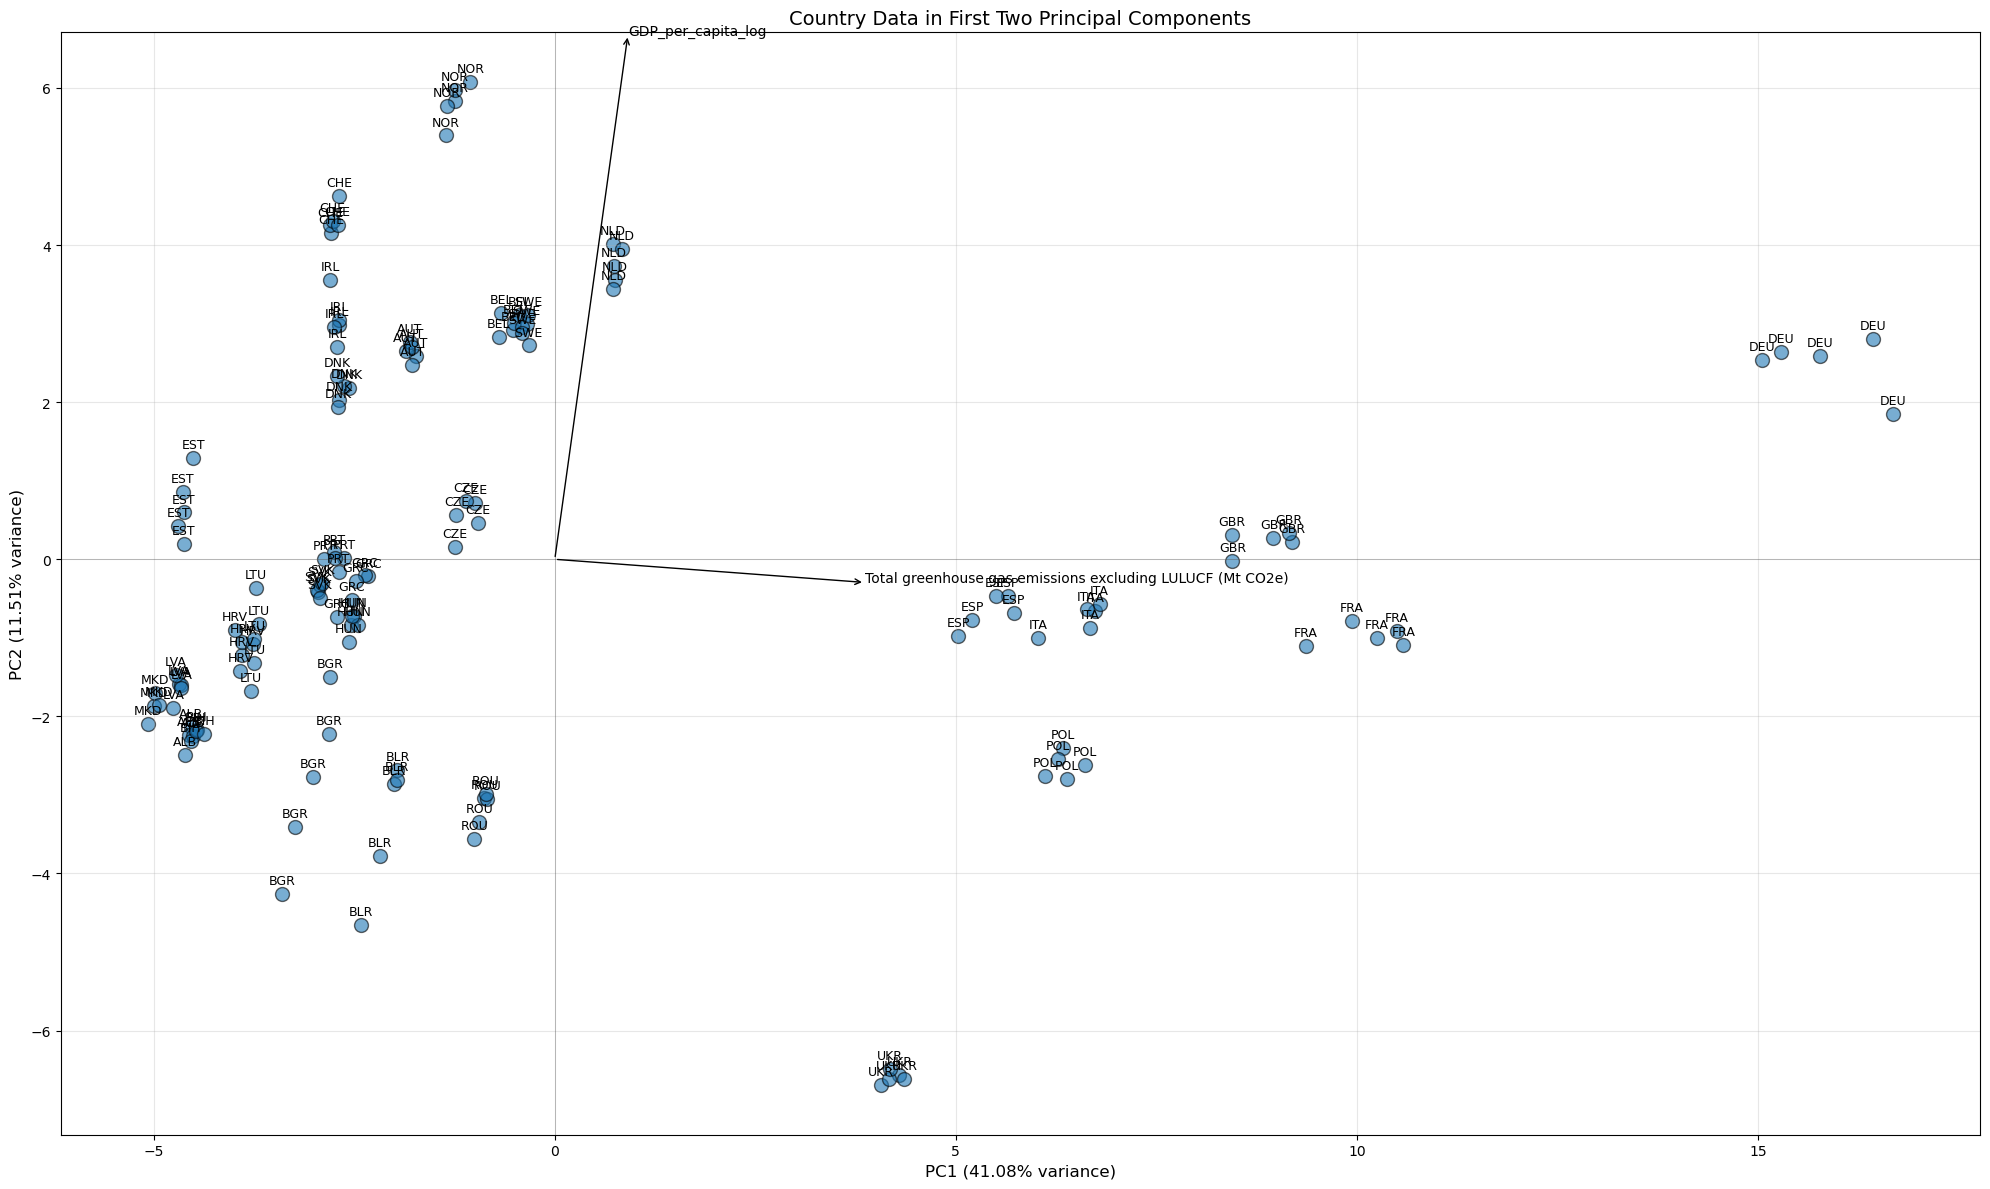

In [342]:
# Plot first two principal components
plt.figure(figsize=(20, 12))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1],  # transformed data contains the values for each country, it contains the loading values
            s=100, alpha=0.6, edgecolors='black', linewidth=1)
# Label each point with country code
for i, code in enumerate(country_codes):
    plt.annotate(code, (transformed_data[i, 0], transformed_data[i, 1]),
                fontsize=9, ha='center', va='bottom',
                xytext=(0, 5), textcoords='offset points')
# Add two features, for instance the one contributing most to the first component and the one contributing more to the second component.
for pc in ['PC1', 'PC2']:
    feat = loading_df[[pc]].abs().sort_values(by=pc, ascending=False).index[0] # access the feature corresonding to the highest coefficient
    coords = np.array(loading_df.loc[feat][['PC1', 'PC2']].values)
    plt.annotate('', xytext=(0, 0), xy=coords*20, # *20 is only to make the arrows visible
            arrowprops=dict(arrowstyle="->"))
    plt.annotate(feat, xytext=coords*20, xy=coords*20)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Country Data in First Two Principal Components', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

